<a href="https://colab.research.google.com/github/Thanvitha/gis/blob/main/ps1_Thanvitha_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS1_Thanvitha Reddy**

# Research interest

In this Project , I am working on mapping the co-relation between the population of India and various parameters such as
1) Human trafficking
2) Suicides
3) Accidents
based on state-wise and showing how each other go hand in hand.

# **Datasets**

I have used various datasets and have attached the links below for reference

*  This dataset contains the population data from the official India govt website - https://censusindia.gov.in/census.website/data/census-tables




# **Importing libraries**

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import seaborn as sns

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 773.6 kB/s eta 0:00:00


In [3]:
! wget -q -O indian_map.zip https://docs.google.com/uc?id=1Bd7AxTbQYiQIPZy4u92ML489KG2OgsZo&export=download

zip_ref = zipfile.ZipFile('indian_map.zip', 'r'); zip_ref.extractall('Indian States'); zip_ref.close() #just unzipping
ind_gdf=gpd.read_file('/content/Indian States/India States/Indian_states.shp')

<Axes: >

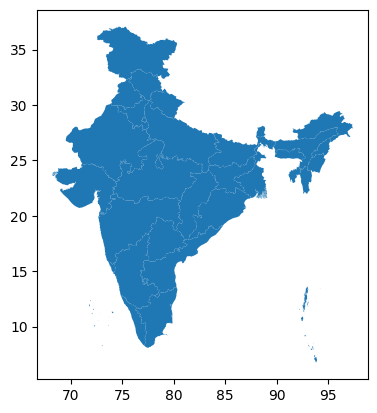

In [4]:
ind_gdf.plot()

In [5]:
ind_gdf['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()
type(ind_gdf)

geopandas.geodataframe.GeoDataFrame

In [6]:
ind_gdf.columns

Index(['st_nm', 'geometry'], dtype='object')

In [7]:
ind_gdf.dtypes

st_nm         object
geometry    geometry
dtype: object

In [ ]:
ind_gdf

In [84]:
path = '/content/drive/MyDrive/india_population_2011.csv'
ind_pop=pd.read_csv(path)

path = '/content/drive/MyDrive/india_humantrafficking_2011.csv'
ind_humantraffic=pd.read_csv(path)
ind_humantraffic.drop(['Sl. No.'], axis=1)

path = '/content/drive/MyDrive/india-distribution-of-suicides-2021-state-ut-city-rate-split.csv'
ind_suicides=pd.read_csv(path)
ind_suicides.drop(['Sl.'], axis=1)

path = '/content/drive/MyDrive/total_accidents_2011.csv'
ind_accidents=pd.read_csv(path)
ind_accidents.drop(['_id'],axis=1)

States/UTs  Forced Labour  \
0                             Andhra Pradesh              0   
1                          Arunachal Pradesh              0   
2                                      Assam            127   
3                                      Bihar            197   
4                               Chhattisgarh             69   
5                                        Goa              0   
6                                    Gujarat              1   
7                                    Haryana              2   
8                           Himachal Pradesh              0   
9                                  Jharkhand            123   
10                                 Karnataka              0   
11                                    Kerala              4   
12                            Madhya Pradesh             50   
13                               Maharashtra             16   
14                                   Manipur              0   
15                                 Meghalaya              0   
16                                   Mizoram              0   
17                                  Nagaland              0   
18                                    Odisha           1018   
19                                    Punjab              0   
20                                 Rajasthan            404   
21                                    Sikkim              0   
22                                Tamil Nadu             21   
23                                 Telangana            202   
24                                   Tripura              0   
25                             Uttar Pradesh              1   
26                               Uttarakhand              0   
27                               West Bengal              0   
28                           Total State (S)           2235   
29               Andaman and Nicobar Islands              0   
30                                Chandigarh              0   
31  Dadra and Nagar Haveli and Daman and Diu              0   
32                                  Delhi UT            451   
33                         Jammu and Kashmir             18   
34                                    Ladakh              0   
35                               Lakshadweep              0   
36                                Puducherry              0   
37                              Total UT (S)            469   
38                           Total All India           2704   

    Sexual Exploitation for Prostitution  Other forms of sexual exploitation  \
0                                    223                                   0   
1                                      0                                   0   
2                                     29                                   0   
3                                    112                                   0   
4                                      3                                   0   
5                                     29                                   0   
6                                     13                                   0   
7                                      6                                   0   
8                                      6                                   0   
9                                      4                                   0   
10                                     6                                   0   
11                                     4                                   0   
12                                    22                                   0   
13                                   856                                   0   
14                                     0                                   0   
15                                     0                                   0   
16                                     0                                   0   
17                                     0                                 

State/UT  Unnamed: 2  Number of Suicides  \
0      ANDHRA PRADESH         NaN              8067.0   
1   ARUNACHAL PRADESH         NaN               160.0   
2               ASSAM         NaN              3262.0   
3               BIHAR         NaN               827.0   
4        CHHATTISGARH         NaN              7828.0   
..                ...         ...                 ...   
93           VARANASI         NaN                90.0   
94        VASAI VIRAR         NaN               328.0   
95         VIJAYAWADA         NaN               385.0   
96     VISHAKHAPATNAM         NaN               378.0   
97     TOTAL (CITIES)         NaN             25891.0   

    Percentage share in total suicides  \
0                                  4.9   
1                                  0.1   
2                                  2.0   
3                                  0.5   
4                                  4.8   
..                                 ...   
93                                 0.3   
94                                 1.3   
95                                 1.5   
96                                 1.5   
97                               100.0   

    Projected mid-year population (in lakhs)  Rate of Suicides  2020 Total  \
0                                     528.49              15.3      7043.0   
1                                      15.37              10.4       160.0   
2                                     351.55               9.3      3243.0   
3                                    1236.95               0.7       809.0   
4                                     296.07              26.4      7710.0   
..                                       ...               ...         ...   
93                                     14.40               6.3        47.0   
94                                     12.20              26.9       309.0   
95                                     14.90              25.8       324.0   
96                                     17.30              21.8       306.0   
97                                   1607.20              16.1     23855.0   

    Percentage variation     Male  Female  Transgender  
0                   14.5   6046.0  2021.0          0.0  
1                    0.0    111.0    49.0          0.0  
2                    0.6   2351.0   911.0          0.0  
3                    2.2    470.0   357.0          0.0  
4                    1.5   5625.0  2203.0          0.0  
..                   ...      ...     ...          ...  
93                  91.5     58.0    32.0          0.0  
94                   6.1    243.0    85.0          0.0  
95                  18.8    304.0    81.0          0.0  
96                  23.5    288.0    90.0          0.0  
97                   8.5  18981.0  6896.0         14.0  

[98 rows x 11 columns]

State/UT/City  Dangerous or Careless Driving/ Overtaking etc Cases  \
0      ANDHRA PRADESH                                               2185     
1   ARUNACHAL PRADESH                                                 65     
2               ASSAM                                                886     
3               BIHAR                                               5039     
4        CHHATTISGARH                                               3536     
..                ...                                                ...     
88           VARANASI                                                 41     
89        VASAI VIRAR                                                 70     
90         VIJAYAWADA                                                124     
91     VISHAKHAPATNAM                                                 31     
92     TOTAL (CITIES)                                              14335     

    Dangerous or Careless Driving/ Overtaking etc Injured  \
0                                                2271       
1                                                  59       
2                                                 833       
3                                                4134       
4                                                3258       
..                                                ...       
88                                                 26       
89                                                 62       
90                                                129       
91                                                 26       
92                                              12062       

    Dangerous or Careless Driving/ Overtaking etc Died  Overspeeding Cases  \
0                                                 755                16631   
1                                                  40                  120   
2                                                 347                 4303   
3                                                4071                 2886   
4                                                1750                 6378   
..                                                ...                  ...   
88                                                 60                   36   
89                                                 22                  276   
90                                                 20                 1101   
91                                                  6                 1785   
92                                               3885                31753   

    Overspeeding Injured  Overspeeding Died  \
0                  16188               6371   
1                    127                 74   
2                   3237               1946   
3                   2348               2284   
4                   5603               2723   
..                   ...                ...   
88                    14                 35   
89                   191                125   
90                   952                267   
91                  1166                261   
92                 27448               7415   

    Driving under Influence of Drug/Alcohol Cases  \
0                                             119   
1                                               3   
2                                             288   
3                                              51   
4                                             145   
..                                            ...   
88                                              9   
89                                              0   
90                                              3   
91                                             41   
92                                           1137   

    Driving under Influence of Drug/Alcohol Injured  \
0                                                64   
1                                                 6   
2                                 

In [10]:
ind_pop.columns

Index(['st_nm', 'Population', 'Males', 'Females',
       'Number of villages_Inhabited', 'Number of villages_Uninhabited',
       'Number of towns', 'Number of households', 'Area in sq. km.',
       'Population per sq. km.'],
      dtype='object')

In [11]:
ind_humantraffic.columns

Index(['Sl. No.', 'States/UTs', 'Forced Labour',
       'Sexual Exploitation for Prostitution',
       'Other forms of sexual exploitation', 'Domestic Servitude',
       'Forced marriage', 'Petty Crimes', 'Child Pornography ', 'Begging',
       'Drug Peddling', 'Removal of Organs', 'Other reasons', 'Total Persons'],
      dtype='object')

In [12]:
ind_suicides.columns

Index(['Sl.', 'State/UT', 'Unnamed: 2', 'Number of Suicides',
       'Percentage share in total suicides',
       'Projected mid-year population (in lakhs)', 'Rate of Suicides',
       '2020 Total', 'Percentage variation', 'Male', 'Female', 'Transgender'],
      dtype='object')

In [85]:
ind_accidents.columns

Index(['_id', 'State/UT/City',
       'Dangerous or Careless Driving/ Overtaking etc Cases',
       'Dangerous or Careless Driving/ Overtaking etc Injured',
       'Dangerous or Careless Driving/ Overtaking etc Died',
       'Overspeeding Cases', 'Overspeeding Injured', 'Overspeeding Died',
       'Driving under Influence of Drug/Alcohol Cases',
       'Driving under Influence of Drug/Alcohol Injured',
       'Driving under Influence of Drug/Alcohol Died',
       'Physical Fatigue of Drivers Cases',
       'Physical Fatigue of Drivers Injured',
       'Physical Fatigue of Drivers Died',
       'Defect in Mechanical Condition of Vehicle Cases',
       'Defect in Mechanical Condition of Vehicle Injured',
       'Defect in Mechanical Condition of Vehicle Died',
       'Animal Crossing Cases', 'Animal Crossing Injured',
       'Animal Crossing Died', 'Weather Condition (Total) Cases',
       'Weather Condition (Total) Injured', 'Weather Condition (Total) Died',
       'Weather Condition (P

In [13]:
ind_pop.dtypes

st_nm                             object
Population                         int64
Males                              int64
Females                            int64
Number of villages_Inhabited       int64
Number of villages_Uninhabited     int64
Number of towns                    int64
Number of households               int64
Area in sq. km.                    int64
Population per sq. km.             int64
dtype: object

In [14]:
ind_humantraffic.dtypes

Sl. No.                                 object
States/UTs                              object
Forced Labour                            int64
Sexual Exploitation for Prostitution     int64
Other forms of sexual exploitation       int64
Domestic Servitude                       int64
Forced marriage                          int64
Petty Crimes                             int64
Child Pornography                        int64
Begging                                  int64
Drug Peddling                            int64
Removal of Organs                        int64
Other reasons                            int64
Total Persons                            int64
dtype: object

In [15]:
ind_suicides.dtypes

Sl.                                         float64
State/UT                                     object
Unnamed: 2                                  float64
Number of Suicides                          float64
Percentage share in total suicides          float64
Projected mid-year population (in lakhs)    float64
Rate of Suicides                            float64
2020 Total                                  float64
Percentage variation                        float64
Male                                        float64
Female                                      float64
Transgender                                 float64
dtype: object

In [86]:
ind_accidents.dtypes

_id                                                        int64
State/UT/City                                             object
Dangerous or Careless Driving/ Overtaking etc Cases        int64
Dangerous or Careless Driving/ Overtaking etc Injured      int64
Dangerous or Careless Driving/ Overtaking etc Died         int64
Overspeeding Cases                                         int64
Overspeeding Injured                                       int64
Overspeeding Died                                          int64
Driving under Influence of Drug/Alcohol Cases              int64
Driving under Influence of Drug/Alcohol Injured            int64
Driving under Influence of Drug/Alcohol Died               int64
Physical Fatigue of Drivers Cases                          int64
Physical Fatigue of Drivers Injured                        int64
Physical Fatigue of Drivers Died                           int64
Defect in Mechanical Condition of Vehicle Cases            int64
Defect in Mechanical Cond

In [16]:
ind_pop['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [17]:
ind_humantraffic=ind_humantraffic.drop(['Sl. No.'], axis=1)

In [18]:
ind_suicides=ind_suicides.drop(['Sl.'], axis=1)

In [87]:
ind_accidents=ind_accidents.drop(['_id'],axis=1)

In [19]:
ind_humantraffic.rename(columns={"States/UTs": "st_nm"}, inplace=True)

In [20]:
ind_suicides.rename(columns={"State/UT": "st_nm"}, inplace=True)

In [88]:
ind_accidents.rename(columns={"State/UT/City": "st_nm"}, inplace=True)

In [21]:
ind_humantraffic['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [22]:
ind_suicides['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [89]:
ind_accidents['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [23]:
ind_humantraffic.head()

st_nm  Forced Labour  Sexual Exploitation for Prostitution  \
0  ANDAMANNICOBARISLAND              0                                   223   
1     ARUNANCHALPRADESH              0                                     0   
2                 ASSAM            127                                    29   
3                 BIHAR            197                                   112   
4            CHANDIGARH             69                                     3   

   Other forms of sexual exploitation  Domestic Servitude  Forced marriage  \
0                                   0                   3                0   
1                                   0                   1                0   
2                                   0                  96               54   
3                                   0                  24                4   
4                                   0                   3                7   

   Petty Crimes  Child Pornography   Begging  Drug Peddling  \
0             0                   0        0              0   
1             0                   0        0              0   
2             6                   1        0              0   
3             0                   0        0              0   
4             0                   0        0              0   

   Removal of Organs  Other reasons  Total Persons  
0                  0             53            279  
1                  0              2              3  
2                  3            109            425  
3                  1             46            384  
4                  0             10             92

In [24]:
ind_suicides.head()

st_nm  Unnamed: 2  Number of Suicides  \
0  ANDAMANNICOBARISLAND         NaN              8067.0   
1     ARUNANCHALPRADESH         NaN               160.0   
2                 ASSAM         NaN              3262.0   
3                 BIHAR         NaN               827.0   
4            CHANDIGARH         NaN              7828.0   

   Percentage share in total suicides  \
0                                 4.9   
1                                 0.1   
2                                 2.0   
3                                 0.5   
4                                 4.8   

   Projected mid-year population (in lakhs)  Rate of Suicides  2020 Total  \
0                                    528.49              15.3      7043.0   
1                                     15.37              10.4       160.0   
2                                    351.55               9.3      3243.0   
3                                   1236.95               0.7       809.0   
4                                    296.07              26.4      7710.0   

   Percentage variation    Male  Female  Transgender  
0                  14.5  6046.0  2021.0          0.0  
1                   0.0   111.0    49.0          0.0  
2                   0.6  2351.0   911.0          0.0  
3                   2.2   470.0   357.0          0.0  
4                   1.5  5625.0  2203.0          0.0

In [90]:
ind_accidents.head()

st_nm  Dangerous or Careless Driving/ Overtaking etc Cases  \
0  ANDAMANNICOBARISLAND                                               2185     
1     ARUNANCHALPRADESH                                                 65     
2                 ASSAM                                                886     
3                 BIHAR                                               5039     
4            CHANDIGARH                                               3536     

   Dangerous or Careless Driving/ Overtaking etc Injured  \
0                                               2271       
1                                                 59       
2                                                833       
3                                               4134       
4                                               3258       

   Dangerous or Careless Driving/ Overtaking etc Died  Overspeeding Cases  \
0                                                755                16631   
1                                                 40                  120   
2                                                347                 4303   
3                                               4071                 2886   
4                                               1750                 6378   

   Overspeeding Injured  Overspeeding Died  \
0                 16188               6371   
1                   127                 74   
2                  3237               1946   
3                  2348               2284   
4                  5603               2723   

   Driving under Influence of Drug/Alcohol Cases  \
0                                            119   
1                                              3   
2                                            288   
3                                             51   
4                                            145   

   Driving under Influence of Drug/Alcohol Injured  \
0                                               64   
1                                                6   
2                                              201   
3                                               53   
4                                              159   

   Driving under Influence of Drug/Alcohol Died  ...  \
0                                            50  ...   
1                                             0  ...   
2                                           154  ...   
3                                            12  ...   
4                                            44  ...   

   Vehicles Parking at Road Shoulders Died  Causes Not Known Cases  \
0                                     18.0                   121.0   
1                                      0.0                     9.0   
2                                     45.0                    42.0   
3                                     95.0                    20.0   
4                                     71.0                   455.0   

   Causes Not Known Injured  Causes Not Known Died  Other Causes Cases  \
0                     119.0                   32.0              2129.0   
1                       4.0                    7.0                38.0   
2                       0.0                   10.0                89.0   
3                      12.0                   22.0               101.0   
4                     220.0                  258.0              1163.0   

   Other Causes Injured  Other Causes Died  Total Road Accidents Cases  \
0                1957.0              817.0                     21556.0   
1                  37.0               28.0                       261.0   
2                  95.0               21.0                      7069.0   
3                  70.0               77.0                      9553.0   
4                 917.0              445.0                     12395.0   

   Total Road Accidents Injured  Total Road Accidents Died  
0                       21040.0                     8186.0  
1                         26

In [25]:
ind_pop.head()

st_nm  Population      Males    Females  \
0  ANDAMANNICOBARISLAND  1028737436  532223090  496514346   
1     ARUNANCHALPRADESH    10143700    5360926    4782774   
2                 ASSAM     6077900    3087940    2989960   
3                 BIHAR    24358999   12985045   11373954   
4            CHANDIGARH      900635     506938     393697   

   Number of villages_Inhabited  Number of villages_Uninhabited  \
0                        593732                           44856   
1                          6417                             235   
2                         17495                            2623   
3                         12278                             395   
4                            23                               1   

   Number of towns  Number of households  Area in sq. km.  \
0             5161             193579954          3287263   
1               75               1568519           222236   
2               57               1221589            55673   
3              157               4348580            50362   
4                1                206465              114   

   Population per sq. km.  
0                     325  
1                     100  
2                     109  
3                     484  
4                    7900

In [38]:
fig, ax = plt.subplots(1, figsize=(20,10))
ind_gdf.plot(ax=ax,column='st_nm',legend=True,cmap='YlOrRd',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'right','title_fontsize':'medium','fontsize':'small','markerscale':1.2})

ax.title.set_text("Population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

# **Merge of India shapefile with Population**

In [40]:
ind_map1 = pd.merge(ind_gdf, ind_pop, on='st_nm',how='outer',indicator=True)
ind_map1[['st_nm','_merge']]

ind_map2 = pd.merge(ind_gdf, ind_pop, on='st_nm',how='inner',indicator=False)

st_nm _merge
0   ANDAMANNICOBARISLAND   both
1      ARUNANCHALPRADESH   both
2                  ASSAM   both
3                  BIHAR   both
4             CHANDIGARH   both
5           CHHATTISGARH   both
6     DADARANAGARHAVELLI   both
7               DAMANDIU   both
8                    GOA   both
9                GUJARAT   both
10               HARYANA   both
11       HIMACHALPRADESH   both
12          JAMMUKASHMIR   both
13             JHARKHAND   both
14             KARNATAKA   both
15                KERALA   both
16           LAKSHADWEEP   both
17         MADHYAPRADESH   both
18           MAHARASHTRA   both
19               MANIPUR   both
20             MEGHALAYA   both
21               MIZORAM   both
22              NAGALAND   both
23            NCTOFDELHI   both
24            PUDUCHERRY   both
25                PUNJAB   both
26             RAJASTHAN   both
27                SIKKIM   both
28             TAMILNADU   both
29             TELANGANA   both
30               TRIPURA   both
31          UTTARPRADESH   both
32           UTTARAKHAND   both
33            WESTBENGAL   both
34                ODISHA   both
35         ANDHRAPRADESH   both

# **Indian Population plots**

<Axes: >

[]

[]

Text(0.5, 1.0, 'Population in 2011')

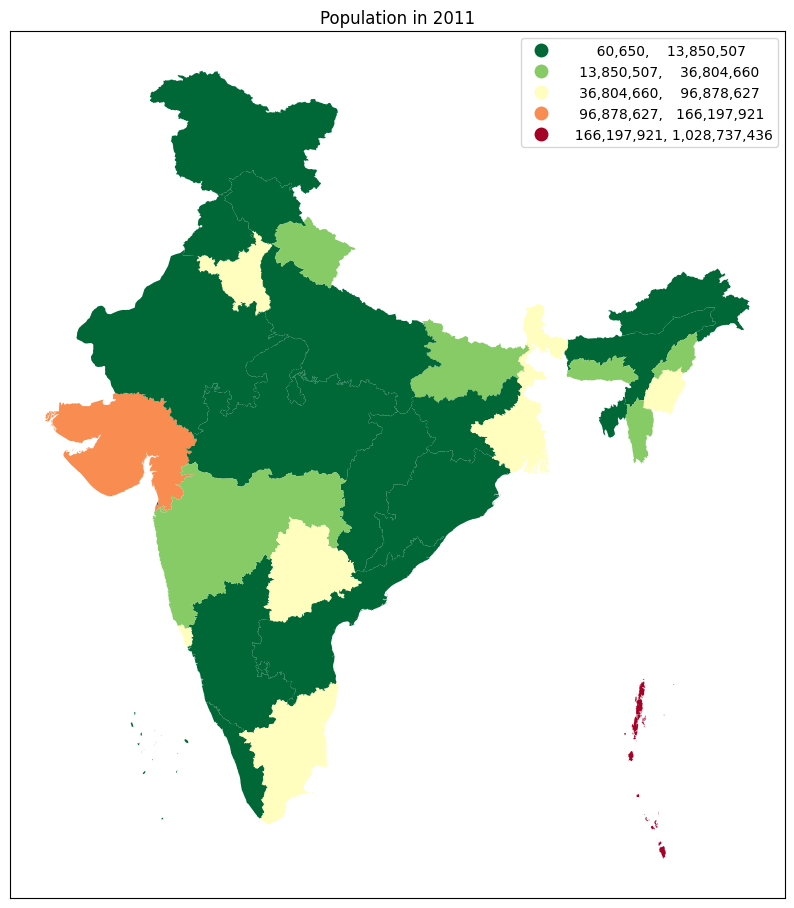

In [110]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map2.plot(ax=ax,figsize=(10,12),column='Population',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Population in 2011')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Population of Males in 2011')

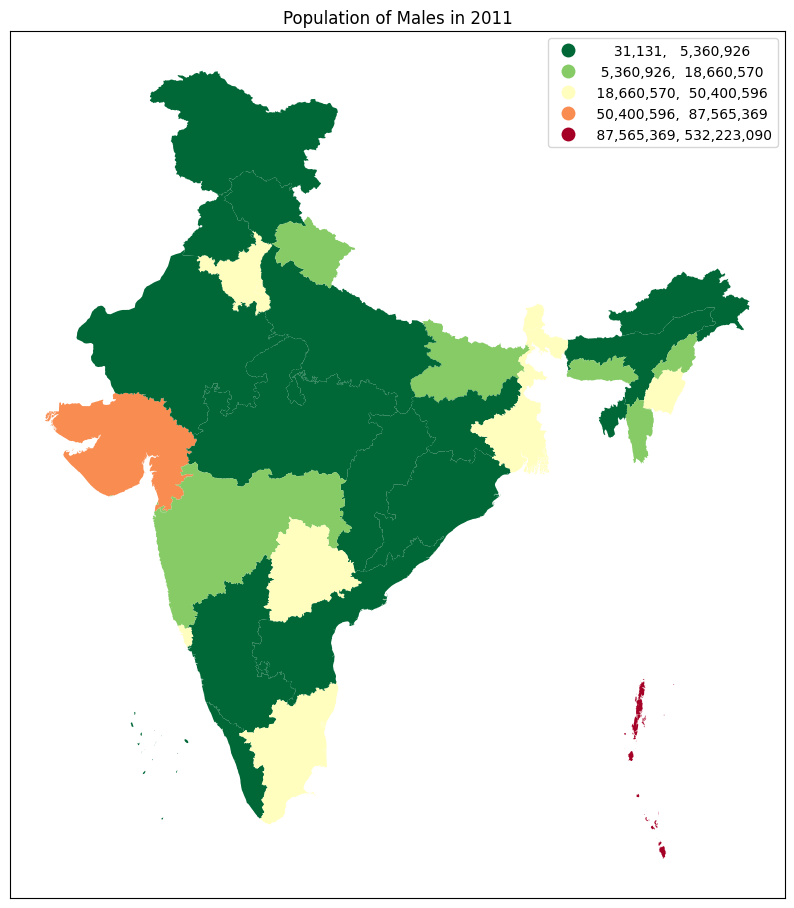

In [111]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map2.plot(ax=ax,figsize=(10,12),column='Males',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Population of Males in 2011')

In [112]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map2.plot(ax=ax,figsize=(10,12),column='Females',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Population of Females in 2011')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Population of Females in 2011')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Number of towns')

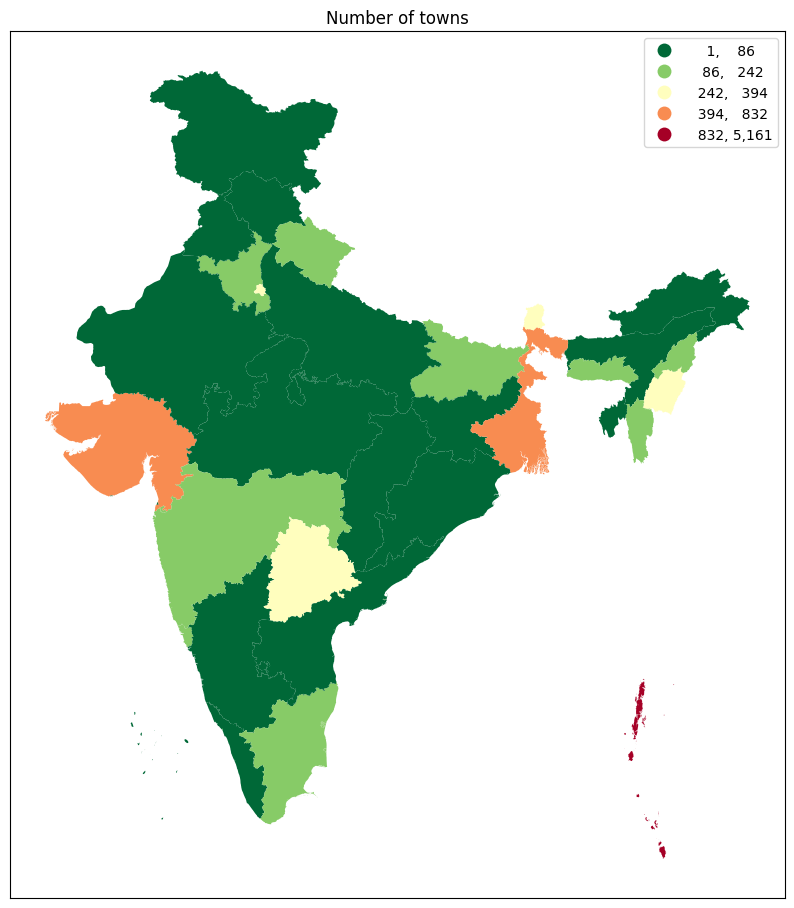

In [113]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map2.plot(ax=ax,figsize=(10,12),column='Number of towns',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Number of towns')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Area in sq. km.')

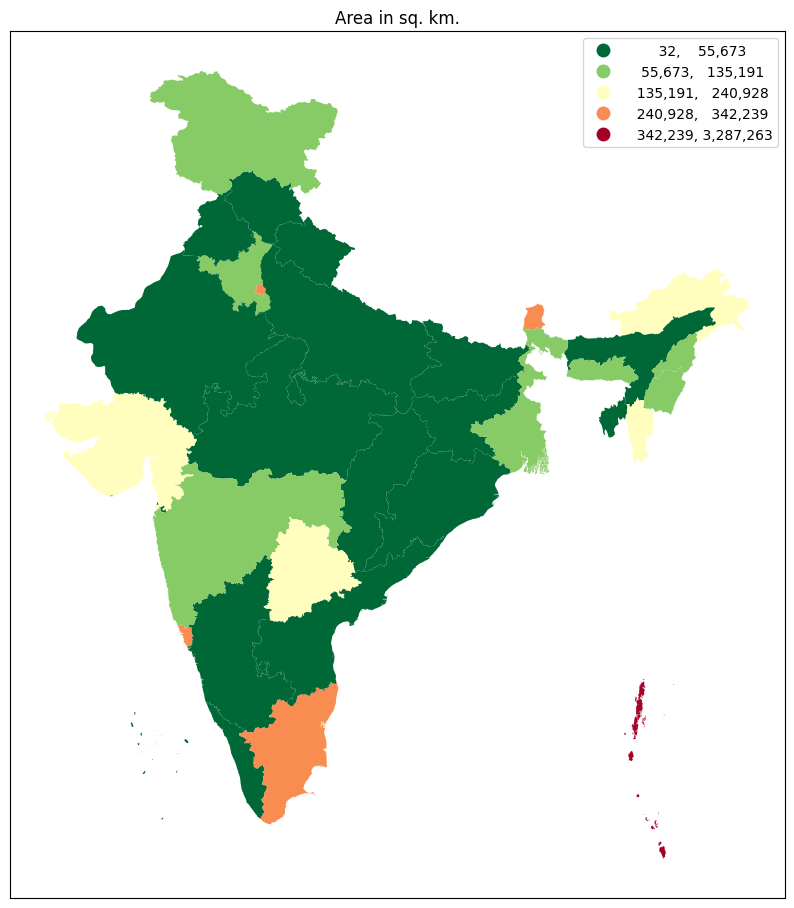

In [114]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map2.plot(ax=ax,figsize=(10,12),column='Area in sq. km.',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Area in sq. km.')

In [115]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map2.plot(ax=ax,figsize=(10,12),column='Population per sq. km.',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Population per sq. km.')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Population per sq. km.')

# **Merge of India shapefile with human trafficking**

In [62]:
ind_map3 = pd.merge(ind_gdf, ind_humantraffic, on='st_nm',how='outer',indicator=True)
ind_map3[['st_nm','_merge']]

ind_map4 = pd.merge(ind_gdf, ind_humantraffic, on='st_nm',how='inner',indicator=False)

st_nm      _merge
0   ANDAMANNICOBARISLAND        both
1      ARUNANCHALPRADESH        both
2                  ASSAM        both
3                  BIHAR        both
4             CHANDIGARH        both
5           CHHATTISGARH        both
6     DADARANAGARHAVELLI        both
7               DAMANDIU        both
8                    GOA        both
9                GUJARAT        both
10               HARYANA        both
11       HIMACHALPRADESH        both
12          JAMMUKASHMIR        both
13             JHARKHAND        both
14             KARNATAKA        both
15                KERALA        both
16           LAKSHADWEEP        both
17         MADHYAPRADESH        both
18           MAHARASHTRA        both
19               MANIPUR        both
20             MEGHALAYA        both
21               MIZORAM        both
22              NAGALAND        both
23            NCTOFDELHI        both
24            PUDUCHERRY        both
25                PUNJAB        both
26             RAJASTHAN        both
27                SIKKIM        both
28             TAMILNADU        both
29             TELANGANA        both
30               TRIPURA        both
31          UTTARPRADESH        both
32           UTTARAKHAND        both
33            WESTBENGAL        both
34                ODISHA        both
35         ANDHRAPRADESH        both
36                   NaN  right_only
37                   NaN  right_only
38                   NaN  right_only

# **Human Trafficking plots**

<Axes: >

[]

[]

Text(0.5, 1.0, 'Forced Labour')

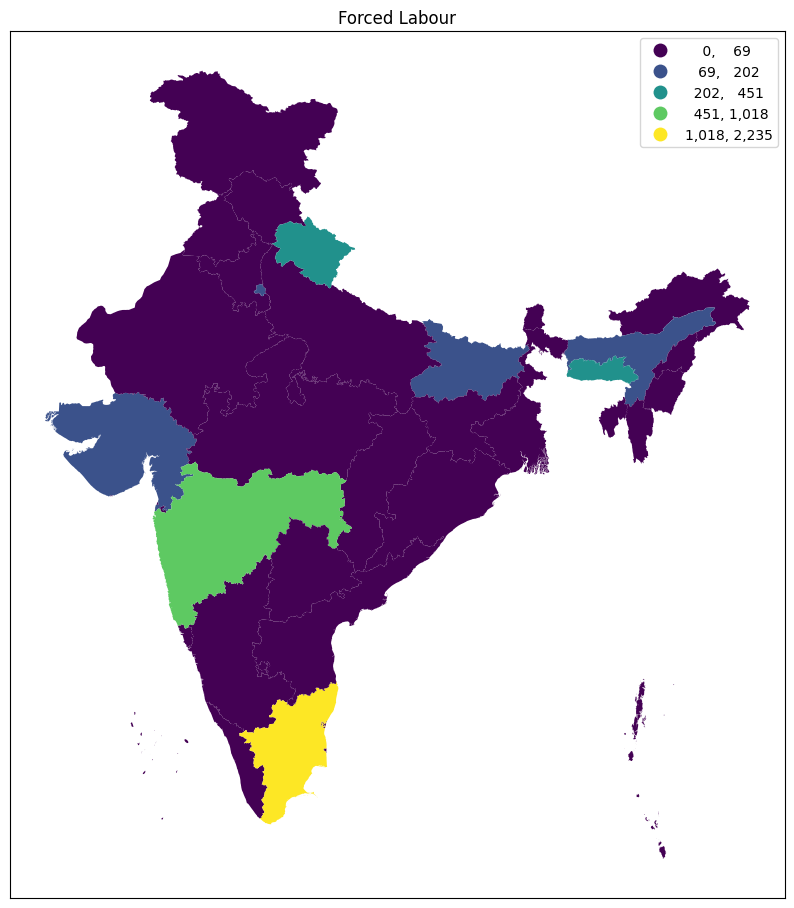

In [64]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Forced Labour',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Forced Labour')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Sexual Exploitation for Prostitution')

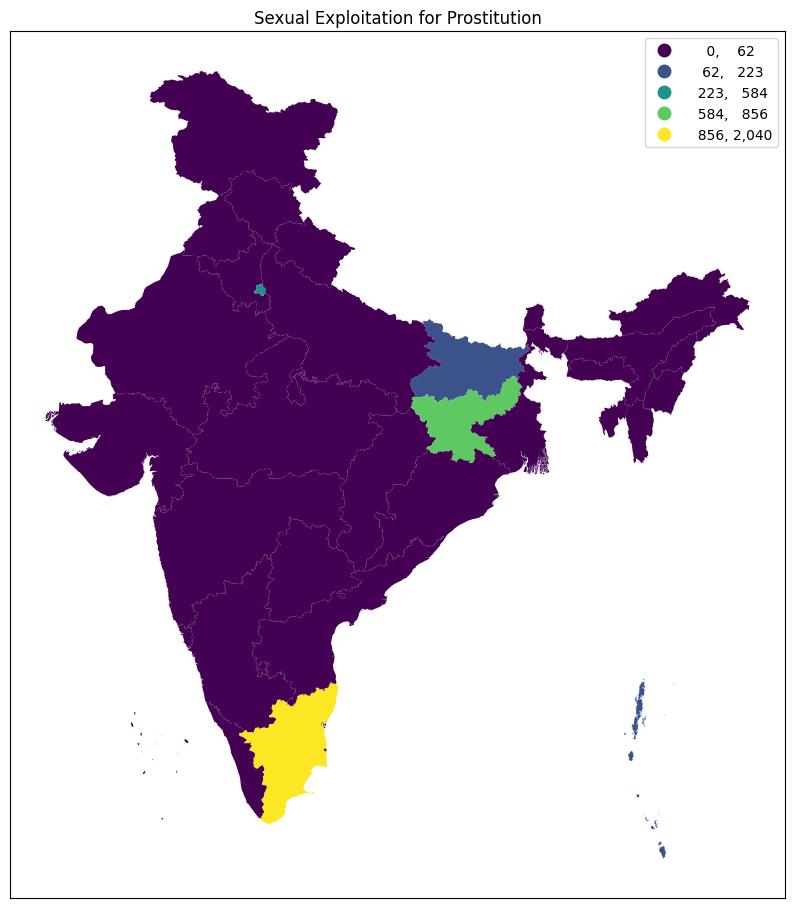

In [65]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Sexual Exploitation for Prostitution',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Sexual Exploitation for Prostitution')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Forced marriage')

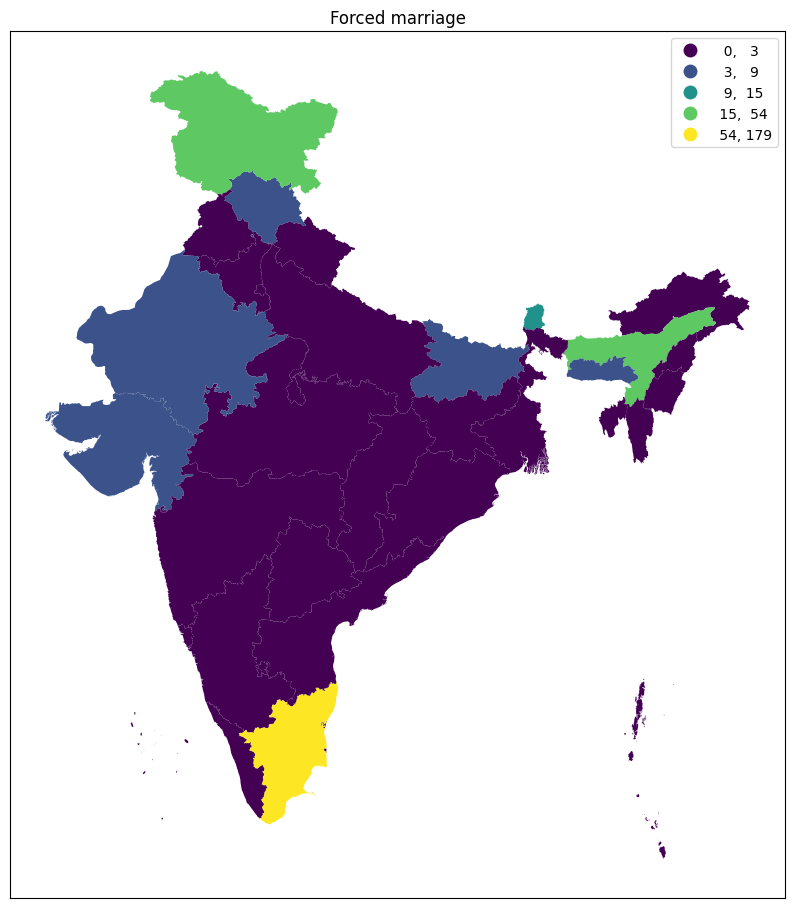

In [66]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Forced marriage',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Forced marriage')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Domestic Servitude')

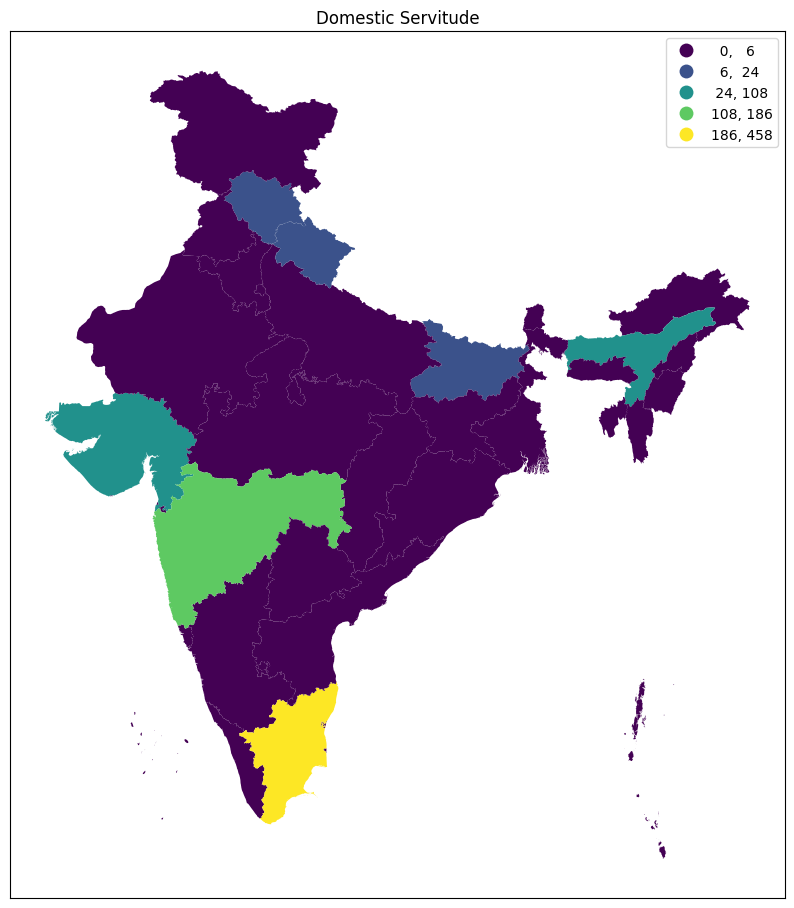

In [67]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Domestic Servitude',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Domestic Servitude')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Petty Crimes')

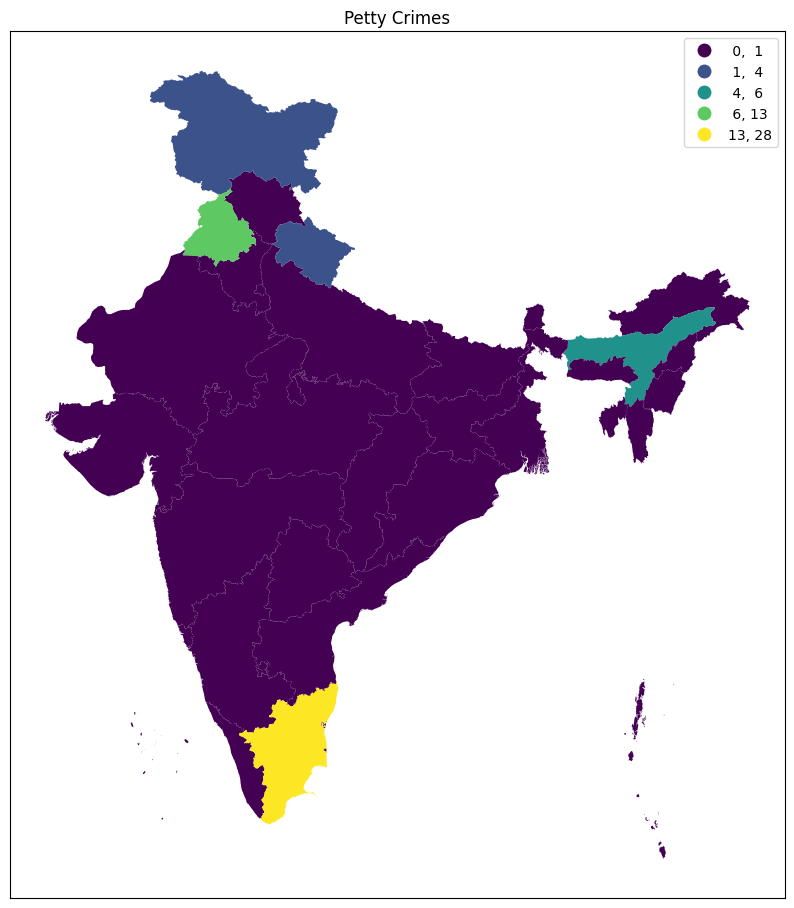

In [68]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Petty Crimes',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Petty Crimes')

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1871: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


<Axes: >

[]

[]

Text(0.5, 1.0, 'Begging')

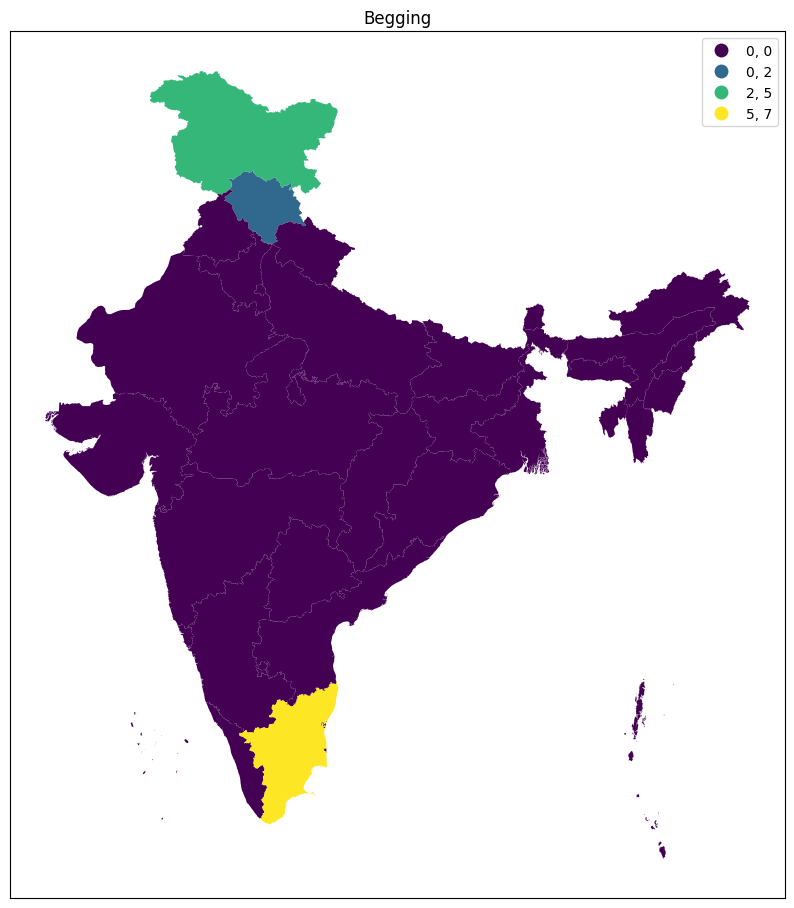

In [69]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Begging',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Begging')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Removal of Organs')

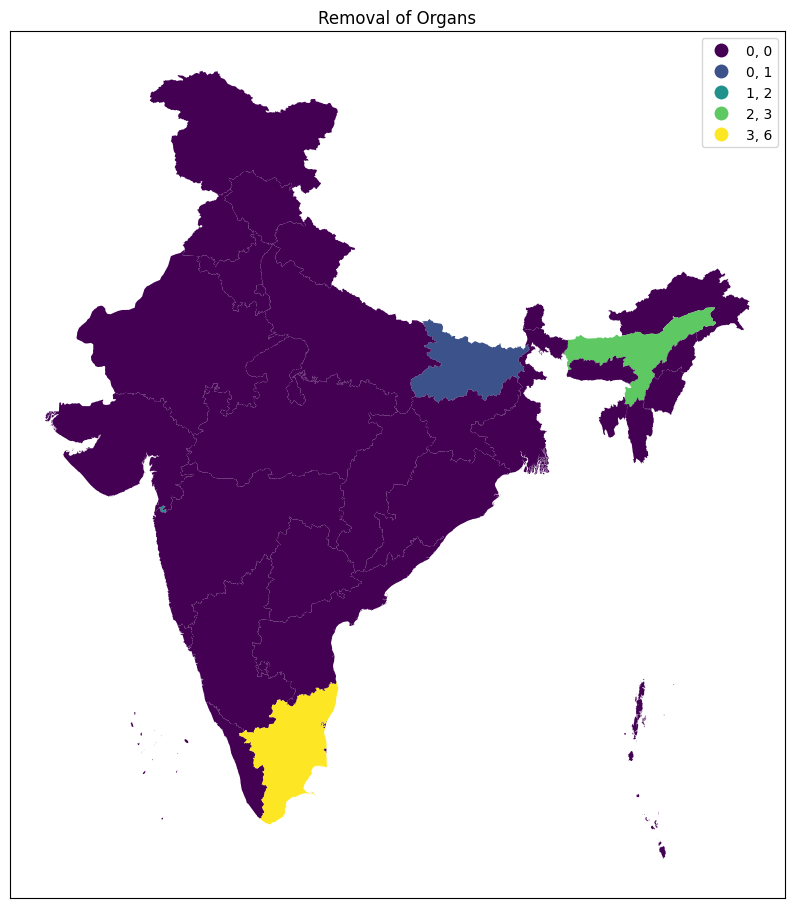

In [70]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Removal of Organs',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Removal of Organs')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Total Persons')

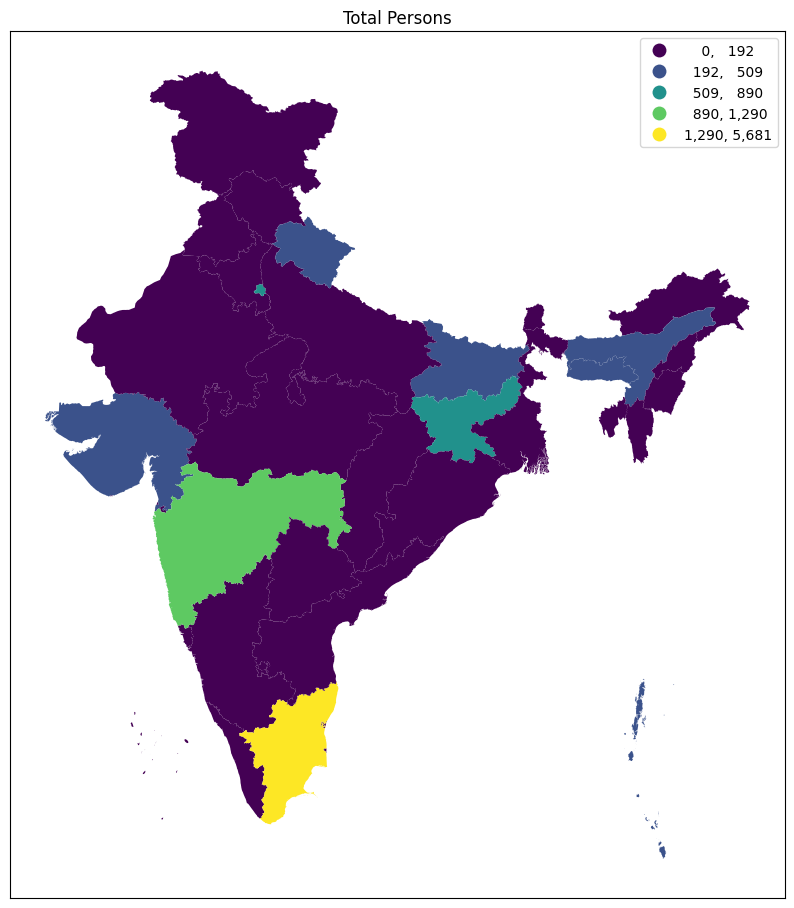

In [71]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map4.plot(ax=ax,figsize=(10,12),column='Total Persons',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Total Persons')

# **Merge of India shapefile with suicides statewise**

In [72]:
ind_map5 = pd.merge(ind_gdf, ind_suicides, on='st_nm',how='outer',indicator=True)
ind_map5[['st_nm','_merge']]

ind_map6 = pd.merge(ind_gdf, ind_suicides, on='st_nm',how='inner',indicator=False)

st_nm      _merge
0   ANDAMANNICOBARISLAND        both
1      ARUNANCHALPRADESH        both
2                  ASSAM        both
3                  BIHAR        both
4             CHANDIGARH        both
..                   ...         ...
93                   NaN  right_only
94                   NaN  right_only
95                   NaN  right_only
96                   NaN  right_only
97                   NaN  right_only

[98 rows x 2 columns]

# **Suicide plots**

<Axes: >

[]

[]

Text(0.5, 1.0, 'Number of Suicides')

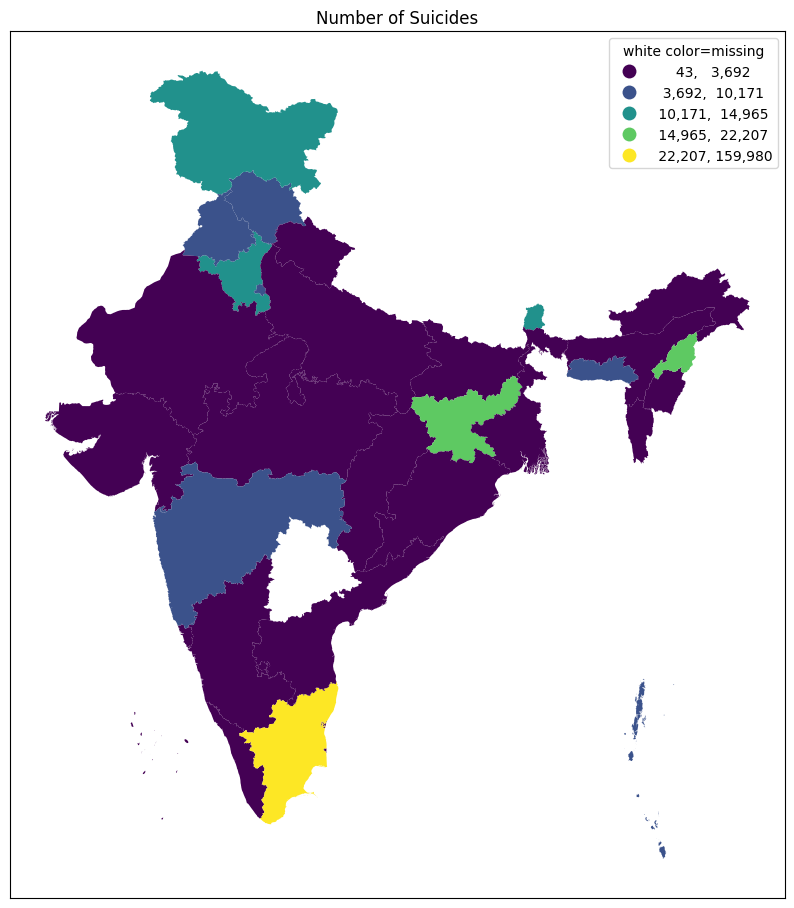

In [83]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map6.plot(ax=ax,figsize=(10,12),column='Number of Suicides',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Number of Suicides')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Projected mid-year population (in lakhs)')

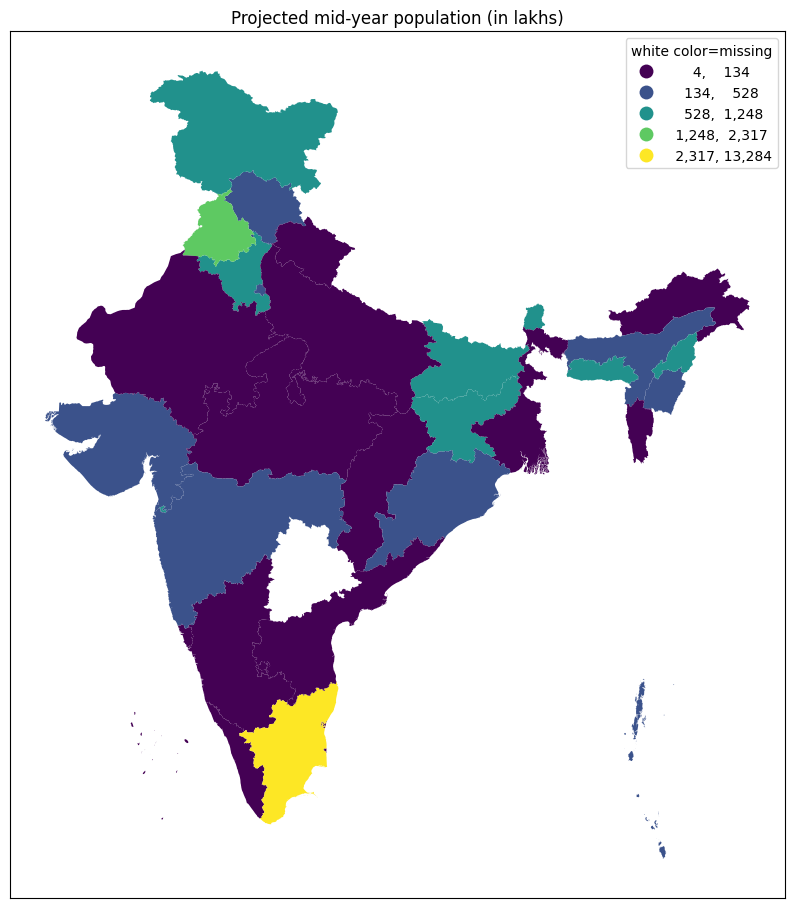

In [82]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map6.plot(ax=ax,figsize=(10,12),column='Projected mid-year population (in lakhs)',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Projected mid-year population (in lakhs)')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Rate of Suicides')

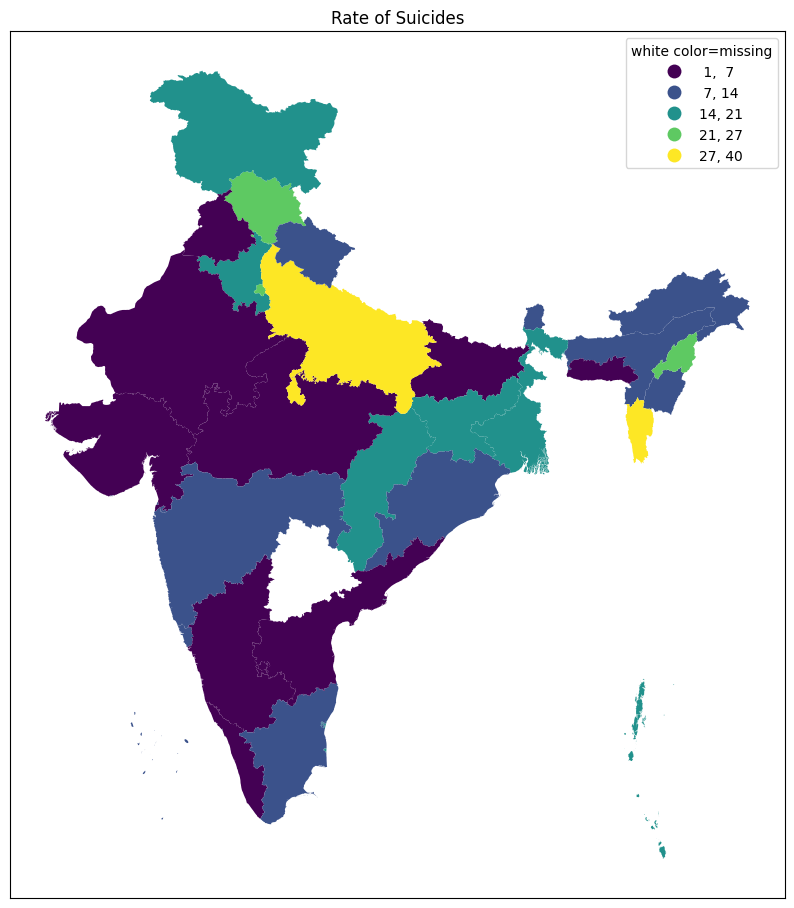

In [81]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map6.plot(ax=ax,figsize=(10,12),column='Rate of Suicides',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Rate of Suicides')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Percentage variation')

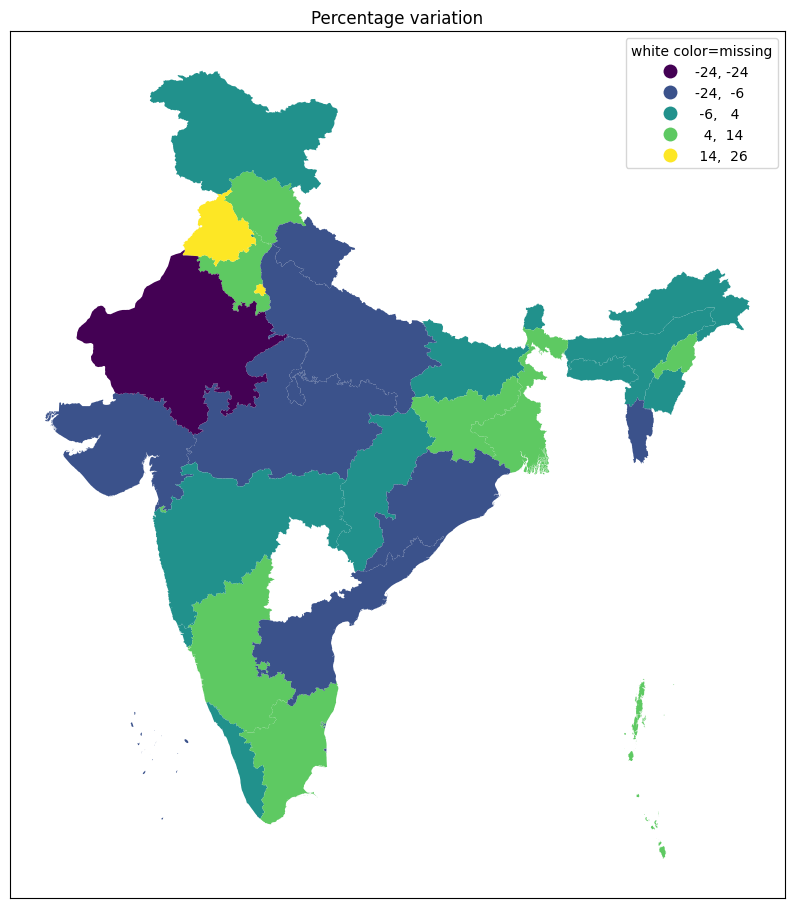

In [80]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map6.plot(ax=ax,figsize=(10,12),column='Percentage variation',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Percentage variation')

## **Merge of India shapefile with Total accidents in 2011**

In [91]:
ind_map7 = pd.merge(ind_gdf, ind_accidents, on='st_nm',how='outer',indicator=True)
ind_map7[['st_nm','_merge']]

ind_map8 = pd.merge(ind_gdf, ind_accidents, on='st_nm',how='inner',indicator=False)

st_nm      _merge
0   ANDAMANNICOBARISLAND        both
1      ARUNANCHALPRADESH        both
2                  ASSAM        both
3                  BIHAR        both
4             CHANDIGARH        both
..                   ...         ...
88                   NaN  right_only
89                   NaN  right_only
90                   NaN  right_only
91                   NaN  right_only
92                   NaN  right_only

[93 rows x 2 columns]

In [95]:
ind_accidents.columns

Index(['st_nm', 'Dangerous or Careless Driving/ Overtaking etc Cases',
       'Dangerous or Careless Driving/ Overtaking etc Injured',
       'Dangerous or Careless Driving/ Overtaking etc Died',
       'Overspeeding Cases', 'Overspeeding Injured', 'Overspeeding Died',
       'Driving under Influence of Drug/Alcohol Cases',
       'Driving under Influence of Drug/Alcohol Injured',
       'Driving under Influence of Drug/Alcohol Died',
       'Physical Fatigue of Drivers Cases',
       'Physical Fatigue of Drivers Injured',
       'Physical Fatigue of Drivers Died',
       'Defect in Mechanical Condition of Vehicle Cases',
       'Defect in Mechanical Condition of Vehicle Injured',
       'Defect in Mechanical Condition of Vehicle Died',
       'Animal Crossing Cases', 'Animal Crossing Injured',
       'Animal Crossing Died', 'Weather Condition (Total) Cases',
       'Weather Condition (Total) Injured', 'Weather Condition (Total) Died',
       'Weather Condition (Poor Visibility) Cases'

<Axes: >

[]

[]

Text(0.5, 1.0, 'Dangerous or Careless Driving/ Overtaking etc Cases')

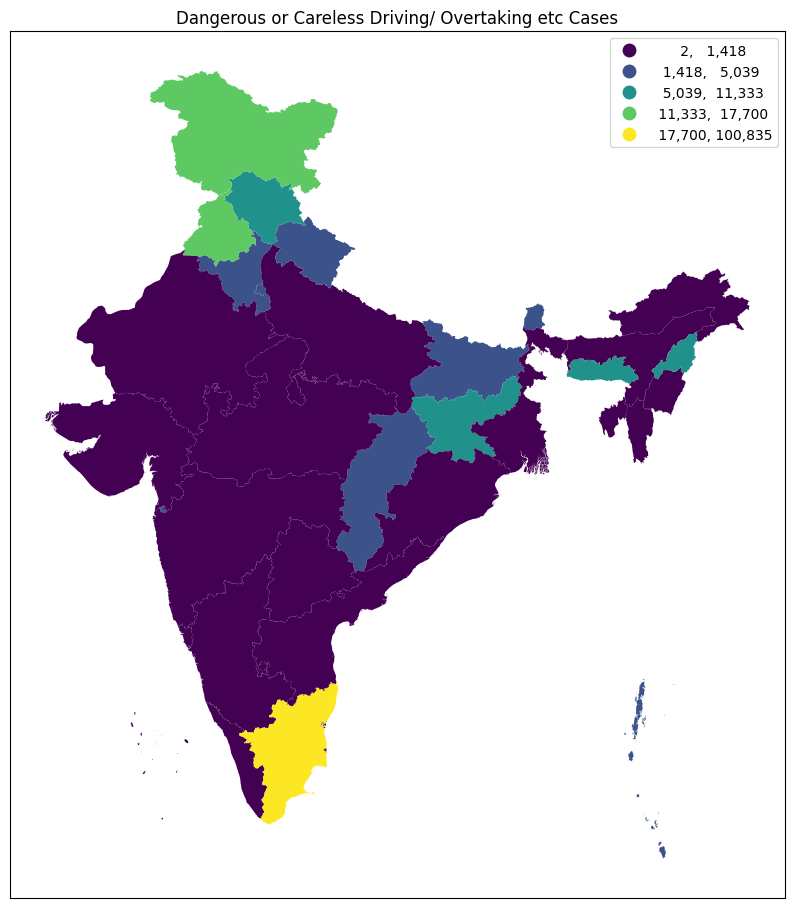

In [104]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Dangerous or Careless Driving/ Overtaking etc Cases',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Dangerous or Careless Driving/ Overtaking etc Cases')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Dangerous or Careless Driving/ Overtaking etc Injured')

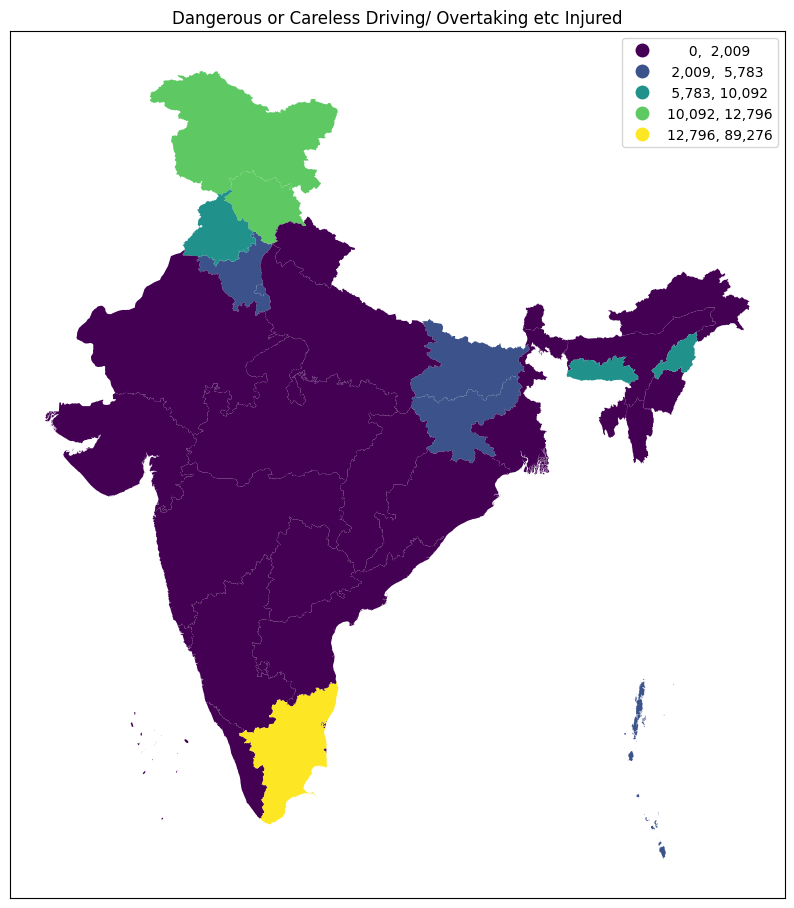

In [103]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Dangerous or Careless Driving/ Overtaking etc Injured',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Dangerous or Careless Driving/ Overtaking etc Injured')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Dangerous or Careless Driving/ Overtaking etc Died')

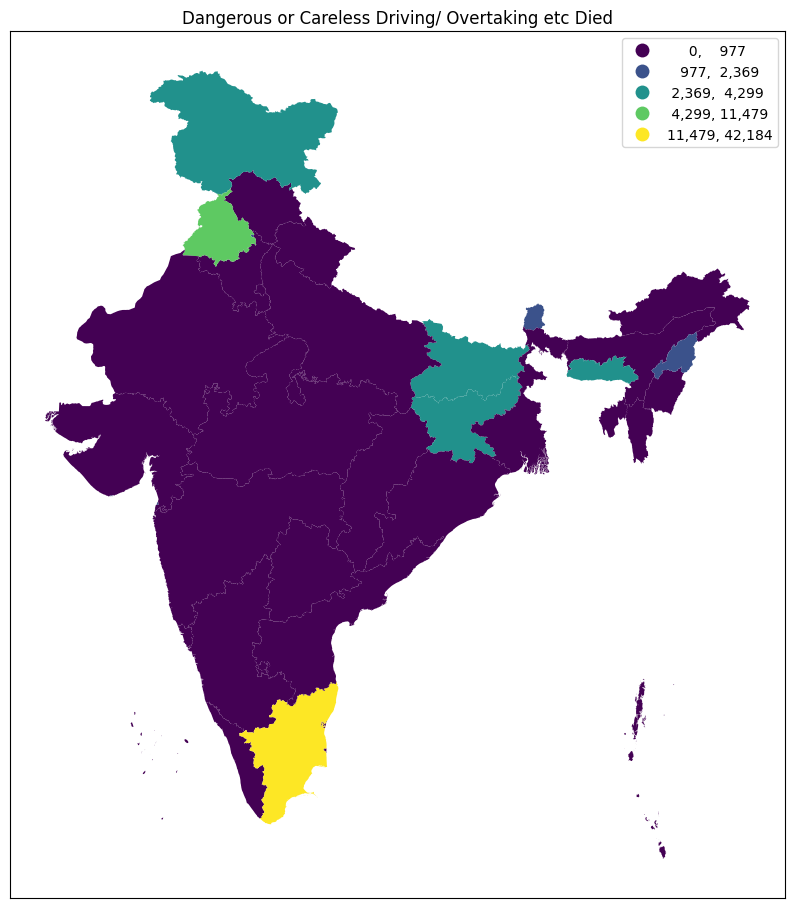

In [102]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Dangerous or Careless Driving/ Overtaking etc Died',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Dangerous or Careless Driving/ Overtaking etc Died')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Weather Condition (Poor Visibility) Cases')

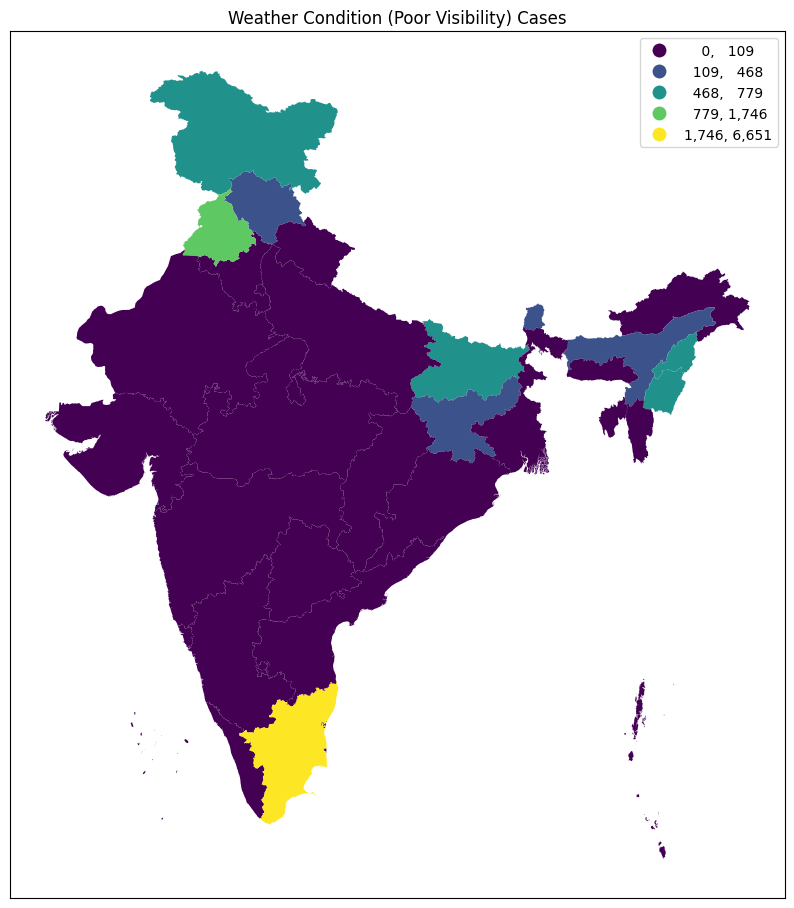

In [105]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Weather Condition (Poor Visibility) Cases',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Weather Condition (Poor Visibility) Cases')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Weather Condition (Total) Injured')

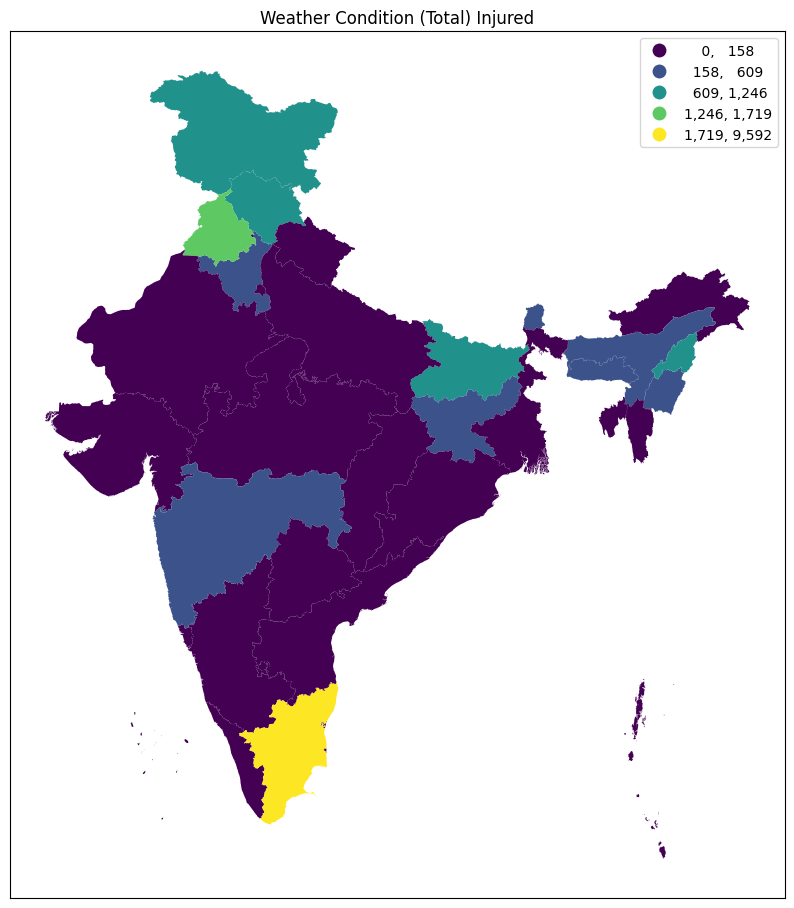

In [108]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Weather Condition (Total) Injured',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Weather Condition (Total) Injured')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Weather Condition (Total) Died')

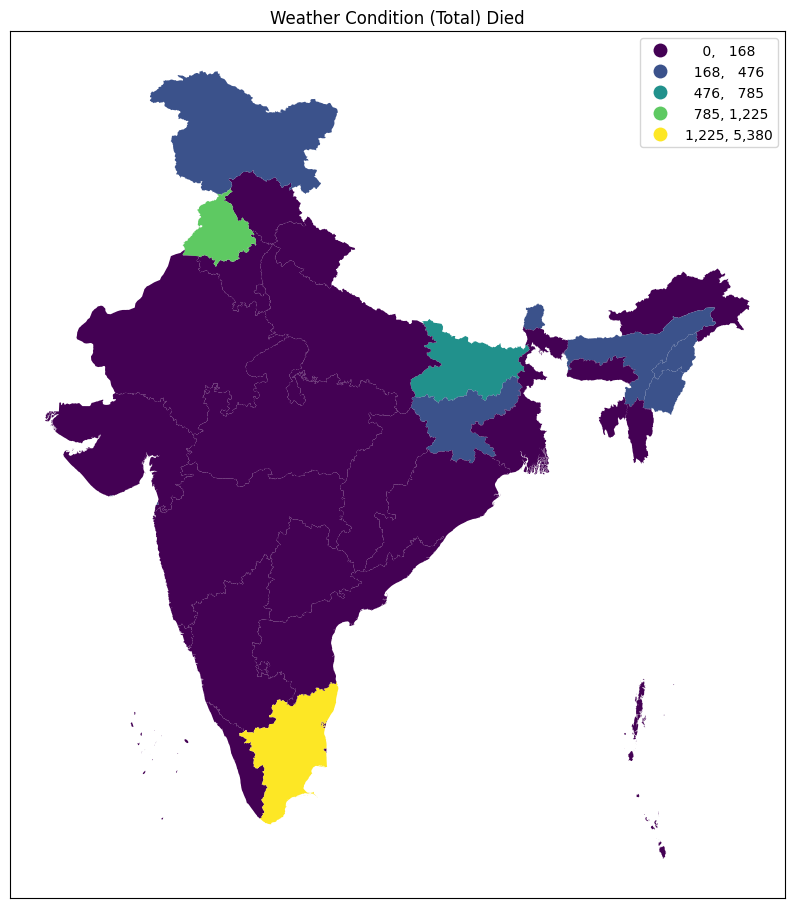

In [109]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Weather Condition (Total) Died',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Weather Condition (Total) Died')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Total Road Accidents Cases')

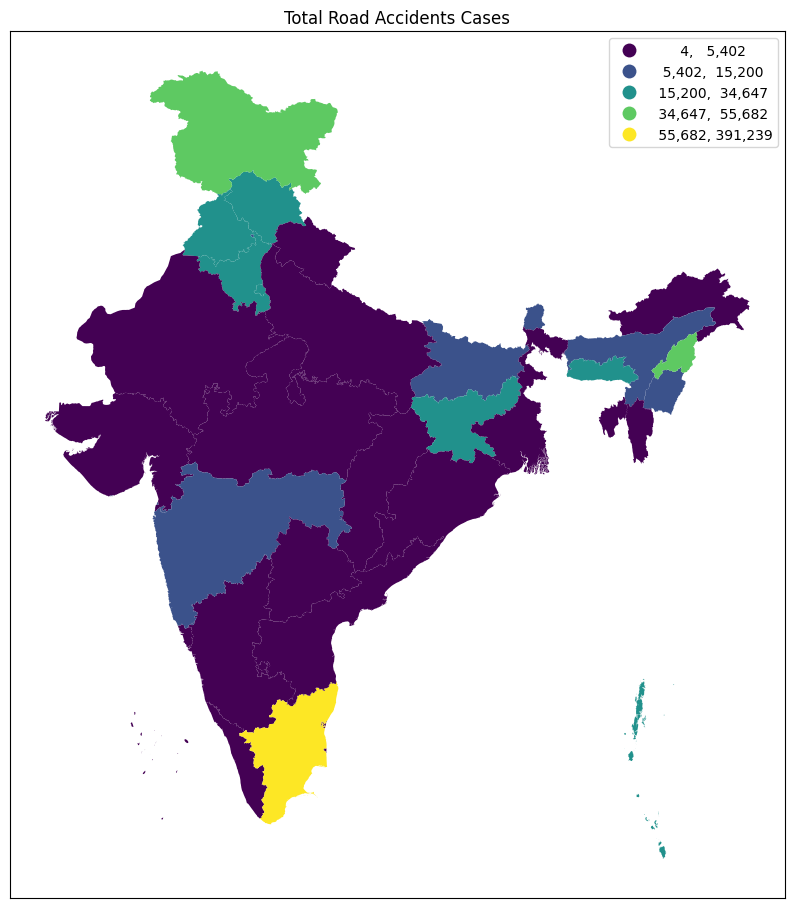

In [101]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Total Road Accidents Cases',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Total Road Accidents Cases')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Total Road Accidents Injured')

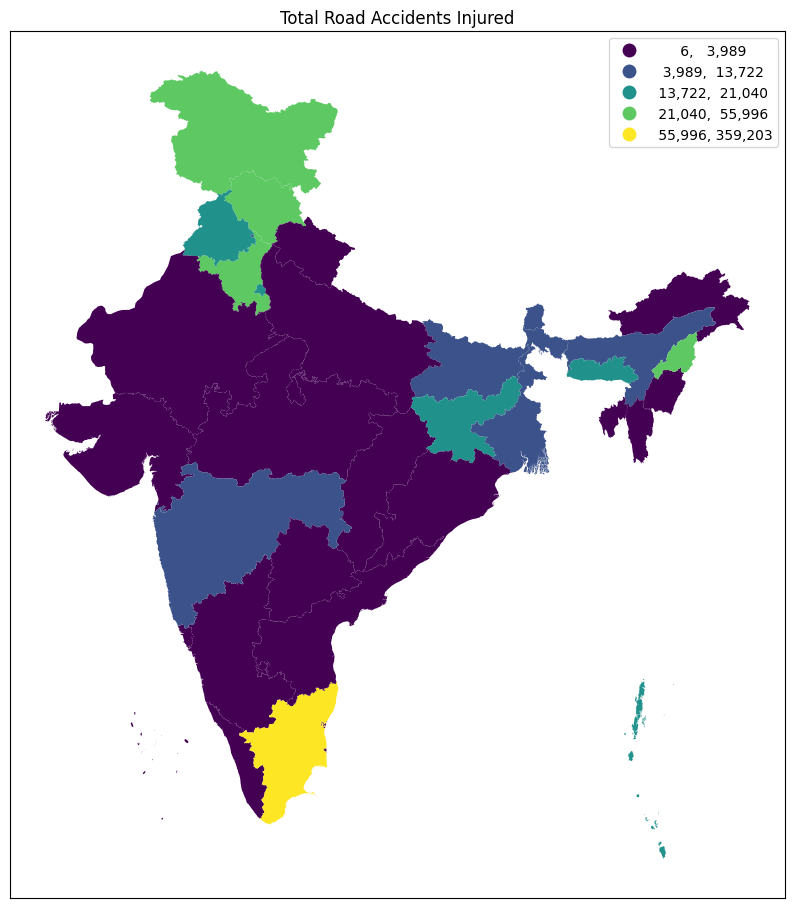

In [100]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Total Road Accidents Injured',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Total Road Accidents Injured')

<Axes: >

[]

[]

Text(0.5, 1.0, 'Total Road Accidents Died')

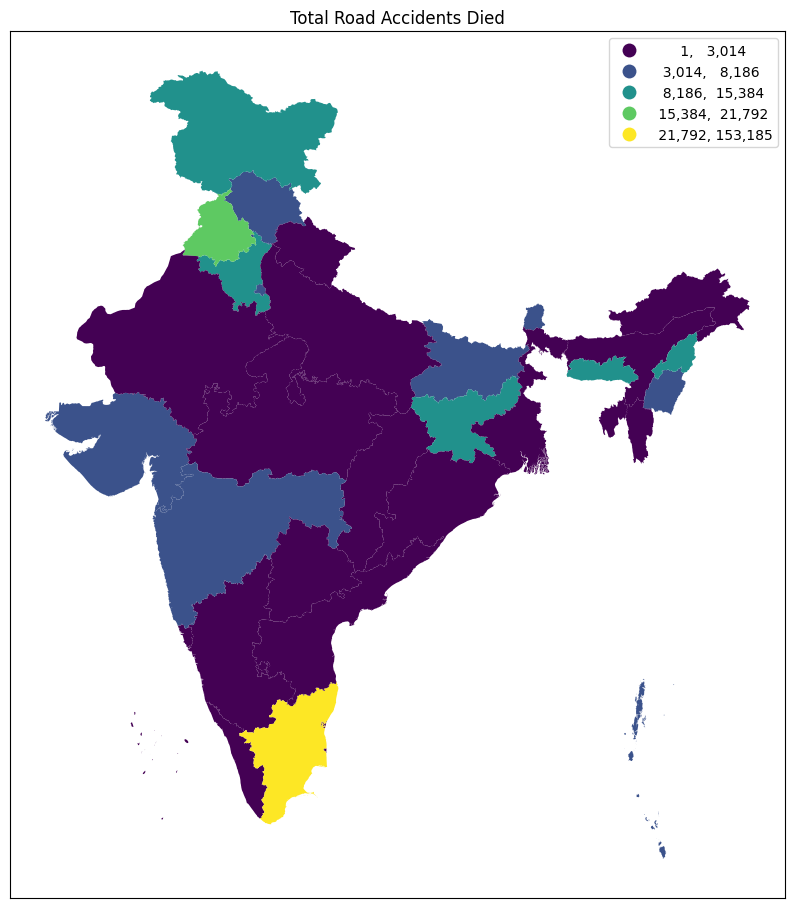

In [99]:
fig, ax = plt.subplots(figsize=(10,12))

ind_map8.plot(ax=ax,figsize=(10,12),column='Total Road Accidents Died',legend=True,
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Total Road Accidents Died')

#**Statistics of Foreign tourist arrivals to India**


In [ ]:
no_of_tourists=pd.read_excel('/content/drive/MyDrive/statistic_id206872_number-of-foreign-tourist-arrivals-in-india-2000-2021.xlsx')

In [ ]:
no_of_tourists.head(10)

Year  Number of foreign tourist arrivals in India 2000-2021
0  2000                                               2.65    
1  2001                                               2.54    
2  2002                                               2.38    
3  2003                                               2.73    
4  2004                                               3.46    
5  2005                                               3.92    
6  2006                                               4.45    
7  2007                                               5.08    
8  2008                                               5.28    
9  2009                                               5.17

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'International Tourists To India [2000-2021]')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of tourists (in millions)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021')])

[Text(0, 0, '2.65'),
 Text(0, 0, '2.54'),
 Text(0, 0, '2.38'),
 Text(0, 0, '2.73'),
 Text(0, 0, '3.46'),
 Text(0, 0, '3.92'),
 Text(0, 0, '4.45'),
 Text(0, 0, '5.08'),
 Text(0, 0, '5.28'),
 Text(0, 0, '5.17'),
 Text(0, 0, '5.78'),
 Text(0, 0, '6.31'),
 Text(0, 0, '6.58'),
 Text(0, 0, '6.97'),
 Text(0, 0, '7.68'),
 Text(0, 0, '8.03'),
 Text(0, 0, '8.8'),
 Text(0, 0, '10.04'),
 Text(0, 0, '10.56'),
 Text(0, 0, '10.93'),
 Text(0, 0, '2.74'),
 Text(0, 0, '1.52')]

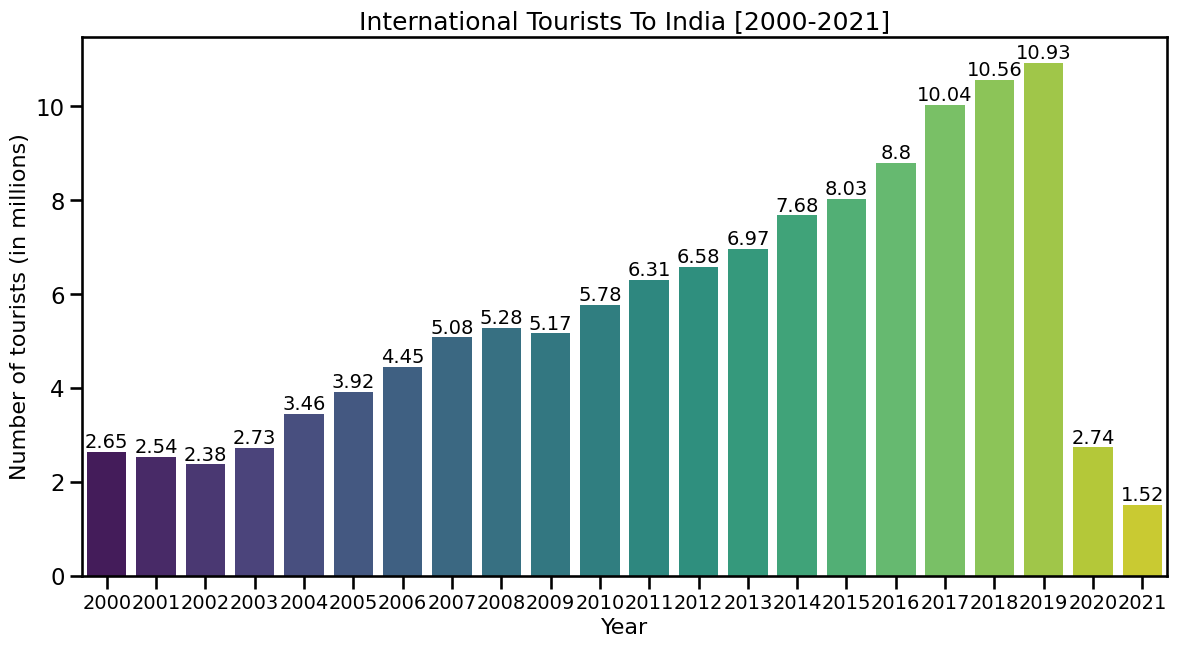

In [ ]:
plt.figure(figsize=(14,7))

g=sns.barplot(x='Year', y='Number of foreign tourist arrivals in India 2000-2021',data=no_of_tourists, palette='viridis', label="Some Label")

plt.title("International Tourists To India [2000-2021]", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of tourists (in millions)", fontsize=16)
plt.xticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=14) #labelling the bars with values

plt.show()

#**Average % distribution of Tourists Quaterly from [2001 - 2019]**

In [ ]:
path = '/content/drive/MyDrive/India-Tourism-Statistics-2001-2019-quaterly.csv'
quarterly=pd.read_csv(path).copy().rename(columns={
    '% Distribution by Quarter - 1st Quarter (Jan-Mar)':'1st Quarter',
    '% Distribution by Quarter - 2nd Quarter(Apr-June)':'2nd Quarter',
    '% Distribution by Quarter - 3rd Quarter (July-Sep)':'3rd Quarter',
    '% Distribution by Quarter - 4th Quarter (Oct-Dec)':'4th Quarter',
})
quarterly.head()

Year  Arrivals  1st Quarter  2nd Quarter  3rd Quarter  4th Quarter
0  2001   2537282         31.3         20.2         23.0         25.5
1  2002   2384364         28.8         18.4         21.1         31.7
2  2003   2726214         27.7         17.6         22.8         31.9
3  2004   3457477         27.8         18.3         21.8         32.1
4  2005   3918610         28.3         18.4         21.4         31.9

In [ ]:
quarter1=quarterly[['Year','1st Quarter']].copy()
quarter2=quarterly[['Year','2nd Quarter']].copy()
quarter3=quarterly[['Year','3rd Quarter']].copy()
quarter4=quarterly[['Year','4th Quarter']].copy()
# quarter1.head()
# quarter2.head()
# quarter3.head()
# quarter4.head()

# converting %ages to actual values
quarter1['1st Quarter']=quarter1['1st Quarter']*quarterly['Arrivals']/100
quarter2['2nd Quarter']=quarter2['2nd Quarter']*quarterly['Arrivals']/100
quarter3['3rd Quarter']=quarter3['3rd Quarter']*quarterly['Arrivals']/100
quarter4['4th Quarter']=quarter4['4th Quarter']*quarterly['Arrivals']/100

In [ ]:
sum_arrivals=quarterly['Arrivals'].sum()

average_percentage_quarter=[
    quarter1['1st Quarter'].sum()/sum_arrivals * 100,
    quarter2['2nd Quarter'].sum()/sum_arrivals * 100,
    quarter3['3rd Quarter'].sum()/sum_arrivals * 100,
    quarter4['4th Quarter'].sum()/sum_arrivals * 100,
]

average_percentage_quarter

[28.807179062028148, 19.187795324983707, 21.64875763359771, 30.349040603325218]

In [ ]:
quarterly2019=quarterly[quarterly['Year']==2019].copy()
quarterly2019=quarterly2019.drop(['Arrivals','Year'],axis=1)

In [ ]:
quarterly2019.head()

1st Quarter  2nd Quarter  3rd Quarter  4th Quarter
18         29.1         19.4         21.7         29.9

<Figure size 1000x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d4e81dccd60>,
 [Text(-0.8706706630647499, 0.6722593223439812, '1st Quarter\n(Jan-Mar)'),
  Text(-0.7138020560921241, -0.8369507899026419, '2nd Quarter\n(Apr-Jun)'),
  Text(0.6062747296927833, -0.9178403739953602, '3rd Quarter\n(Jul-Sep)'),
  Text(0.8872733557376457, 0.6501891972326652, '4th Quarter\n(Oct-Dec)')],
 [Text(-0.47491127076259076, 0.36668690309671703, '29.1%'),
  Text(-0.38934657605024947, -0.45651861267416827, '19.4%'),
  Text(0.3306953071051545, -0.5006402039974692, '21.7%'),
  Text(0.4839672849478066, 0.3546486530359992, '29.9%')])

Text(0.5, 1.0, 'Average % Distribution of Tourists Quarterly in 2019')

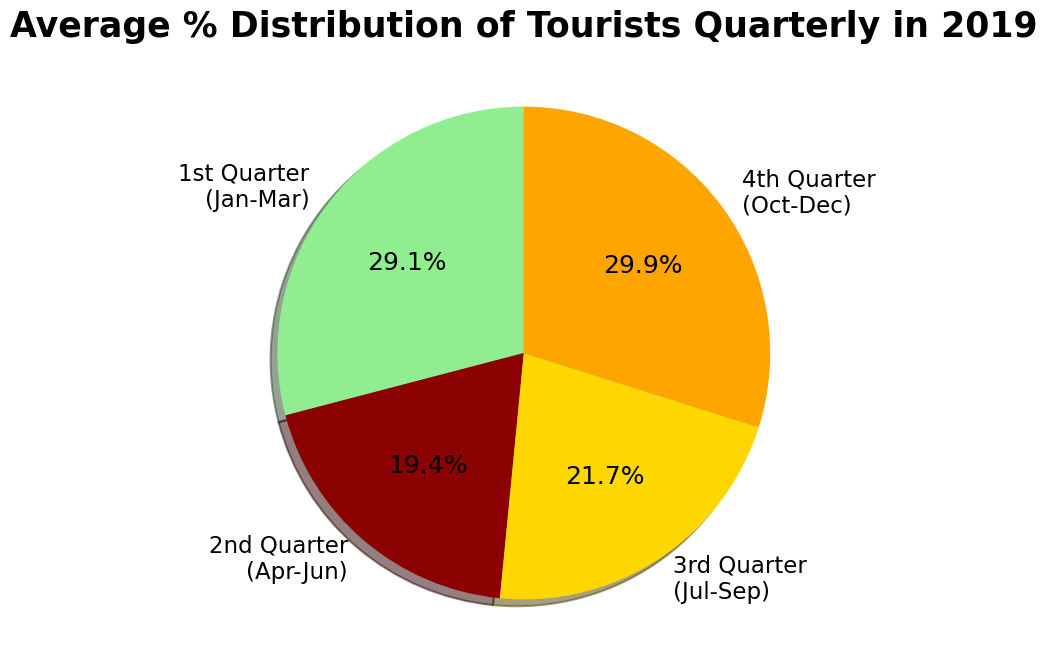

In [ ]:
colors = ['yellowgreen', 'lightgreen', 'darkred', 'gold','orange', 'red', 'lightsalmon']
quarter_labels=['1st Quarter\n(Jan-Mar)','2nd Quarter\n(Apr-Jun)','3rd Quarter\n(Jul-Sep)','4th Quarter\n(Oct-Dec)']

plt.figure(figsize=(10,8))
plt.pie(quarterly2019.loc[18,:].values.tolist(), labels=quarter_labels, colors=colors[1:],
            autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Average % Distribution of Tourists Quarterly in 2019",fontsize=25,fontweight='bold')

# displaying chart
plt.show()

#**Average % age distribution of Tourists based on age [2001 - 2019]**

In [ ]:
path = ('/content/drive/MyDrive/India-Tourism-Statistics-2001-2019-agegroup.csv')
agegroup=pd.read_csv(path)

In [ ]:
agegroup.head()

Year     FTAs  % distribution by Age-Group (in Year) - 0-14  \
0  2001  2537282                                           7.0   
1  2002  2384364                                           9.2   
2  2003  2726214                                           7.2   
3  2004  3457477                                           8.5   
4  2005  3918610                                           8.6   

   % distribution by Age-Group (in Year) - 15-24  \
0                                           10.8   
1                                           10.0   
2                                           10.0   
3                                            9.8   
4                                            9.6   

   % distribution by Age-Group (in Year) - 25-34  \
0                                           20.1   
1                                           19.4   
2                                           19.5   
3                                           18.8   
4                                           18.8   

   % distribution by Age-Group (in Year) - 35-44  \
0                                           21.1   
1                                           21.6   
2                                           21.6   
3                                           21.3   
4                                           21.3   

   % distribution by Age-Group (in Year) - 45-54  \
0                                           19.4   
1                                           19.4   
2                                           19.4   
3                                           19.4   
4                                           19.5   

   % distribution by Age-Group (in Year) - 55-64  \
0                                           11.9   
1                                           11.5   
2                                           11.5   
3                                           12.8   
4                                           13.0   

   % distribution by Age-Group (in Year) - 65 and above  \
0                                                6.7      
1                                                7.7      
2                                                7.7      
3                                                8.2      
4                                                8.7      

   % distribution by Age-Group (in Year) - Not Reported  
0                                                3.0     
1                                                1.2     
2                                                3.1     
3                                                0.2     
4                                                0.5

In [ ]:
# Renaming the columns
agegroup_elaborate=agegroup.copy().rename(columns={
    '% distribution by Age-Group (in Year) - 0-14':'0-14',
    '% distribution by Age-Group (in Year) - 15-24':'15-24',
    '% distribution by Age-Group (in Year) - 25-34':'25-34',
    '% distribution by Age-Group (in Year) - 35-44':'35-44',
    '% distribution by Age-Group (in Year) - 45-54':'45-54',
    '% distribution by Age-Group (in Year) - 55-64':'55-64',
    '% distribution by Age-Group (in Year) - 65 and above':'65 and above',
    '% distribution by Age-Group (in Year) - Not Reported':'Not Reported',
})

# converting %ages to actual values and shifting the decimal places by 3 to the left
agegroup_elaborate['0-14']=agegroup_elaborate['0-14']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['15-24']=agegroup_elaborate['15-24']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['25-34']=agegroup_elaborate['25-34']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['35-44']=agegroup_elaborate['35-44']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['45-54']=agegroup_elaborate['45-54']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['55-64']=agegroup_elaborate['55-64']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['65 and above']=agegroup_elaborate['65 and above']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['Not Reported']=agegroup_elaborate['Not Reported']*agegroup_elaborate['FTAs']/100 * 10**-3

agegroup_elaborate.head()

Year     FTAs        0-14       15-24       25-34       35-44       45-54  \
0  2001  2537282  177.609740  274.026456  509.993682  535.366502  492.232708   
1  2002  2384364  219.361488  238.436400  462.566616  515.022624  462.566616   
2  2003  2726214  196.287408  272.621400  531.611730  588.862224  528.885516   
3  2004  3457477  293.885545  338.832746  650.005676  736.442601  670.750538   
4  2005  3918610  337.000460  376.186560  736.698680  834.663930  764.128950   

        55-64  65 and above  Not Reported  
0  301.936558    169.997894     76.118460  
1  274.201860    183.596028     28.612368  
2  313.514610    209.918478     84.512634  
3  442.557056    283.513114      6.914954  
4  509.419300    340.919070     19.593050

In [ ]:
# finding average %ages for each agegroup from their actual values
tot_fta=agegroup['FTAs'].sum()

# 10**5 (100 * 10**3) since distribution among agegroups was converted to thousands previously
avg_agegroup_pctg=[
    agegroup_elaborate['0-14'].sum()*10**5/tot_fta,
    agegroup_elaborate['15-24'].sum()*10**5/tot_fta,
    agegroup_elaborate['25-34'].sum()*10**5/tot_fta,
    agegroup_elaborate['35-44'].sum()*10**5/tot_fta,
    agegroup_elaborate['45-54'].sum()*10**5/tot_fta,
    agegroup_elaborate['55-64'].sum()*10**5/tot_fta,
    agegroup_elaborate['65 and above'].sum()*10**5/tot_fta
]

print(avg_agegroup_pctg)

[9.290327244694959, 8.526830283828492, 18.353340597195853, 20.92885960109853, 19.620265319294138, 13.637821302553538, 8.356931097199208]


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Average % of tourists based on age [2001-2019]')

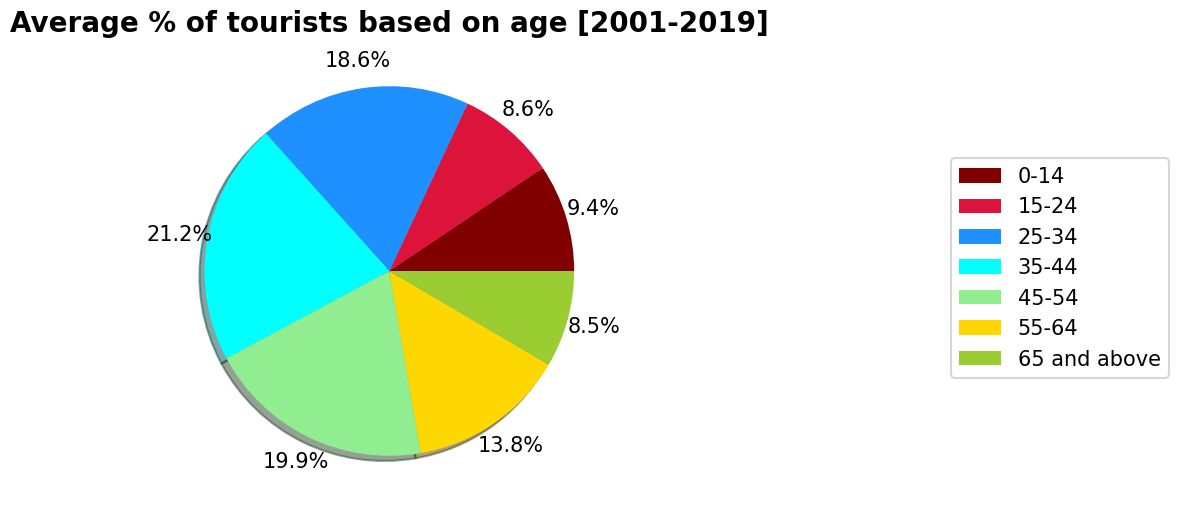

In [ ]:
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen','gold','yellowgreen']
agegroup_list=['0-14','15-24','25-34','35-44','45-54','55-64','65 and above']

# plotting data on chart
plt.figure(figsize=(8,6))

pie=plt.pie(avg_agegroup_pctg, colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=0,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],agegroup_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)

plt.title("Average % of tourists based on age [2001-2019]",fontsize=20,fontweight='bold')

# displaying chart
plt.show()


# **Tourists Visit to India from top 5 countries in 2019**

In [ ]:
country_and_reason=pd.read_csv('/content/drive/MyDrive/India-Tourism-Statistics-2019_region-and-reason.csv')
country_and_reason.head()

Region Country of Nationality  Arrivals (in numbers)  \
0            North America                 CANADA                 351859   
1            North America          UNITED STATES                1512032   
2            North America                 OTHERS                      1   
3            North America                  Total                1863892   
4  Central & South America              ARGENTINA                  12844   

   Business and Professional(%)  Leisure Holiday and Recreation(%)  \
0                          4.82                              50.94   
1                         11.24                              38.56   
2                          0.00                             100.00   
3                         10.03                              40.90   
4                         14.69                              78.60   

   Medical(%)  Indian Diaspora(%)  Others(%)  
0        0.14               21.49      22.61  
1        0.08               29.48      20.64  
2        0.00                0.00       0.00  
3        0.09               27.97      21.01  
4        0.08                1.25       5.38

In [ ]:
countrywise=country_and_reason[country_and_reason['Country of Nationality'].isin(['Total','Grand Total','Not Classified Elsewhere','OTHERS'])==False].copy()
# Sorting w.r.t Arrivals in descending order
countrywise.sort_values(by=["Arrivals (in numbers)"],ascending=False, inplace = True)
# fetching 5 countries with top arrivals
countrywise=countrywise.iloc[0:5,:]
# dropping column 'Region'
countrywise.drop(["Region"],axis=1,inplace=True)

# Renaming columns
countrywise.rename(columns={
    'Business and Professional(%)':'Business and Professional',
    'Leisure Holiday and Recreation(%)':'Leisure Holiday and Recreation',
    'Medical(%)':'Medical',
    'Indian Diaspora(%)':'Indian Diaspora',
    'Others(%)':'Others'
},inplace=True)

# converting %ages to actual values and shifting the decimal places by 3 to the left
countrywise['Business and Professional']=countrywise['Business and Professional']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Leisure Holiday and Recreation']=countrywise['Leisure Holiday and Recreation']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Medical']=countrywise['Medical']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Indian Diaspora']=countrywise['Indian Diaspora']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Others']=countrywise['Others']*countrywise['Arrivals (in numbers)']/100* 10**-3

# dropping column
countrywise.drop(["Arrivals (in numbers)"],axis=1,inplace=True)

countrywise.head()

Country of Nationality  Business and Professional  \
55             BANGLADESH                 108.522307   
1           UNITED STATES                 169.952397   
24         UNITED KINGDOM                 107.931507   
78              AUSTRALIA                  29.893417   
0                  CANADA                  16.959604   

    Leisure Holiday and Recreation     Medical  Indian Diaspora      Others  
55                     1994.129607  396.969958        20.364043   57.741085  
1                       583.039539    1.209626       445.747034  312.083405  
24                      405.418348    1.000292       302.688359  183.153465  
78                      132.904518    0.367241       154.645185   49.430639  
0                       179.236975    0.492603        75.614499   79.555320

<Figure size 2000x800 with 0 Axes>

<Axes: xlabel='Country of Nationality', ylabel='value'>

Text(0, 0.5, 'Arrivals (in thousands)')

Text(0.5, 0, 'Country of Nationality')

Text(0.5, 1.0, 'Tourists to India from Top 5 countries (2019)')

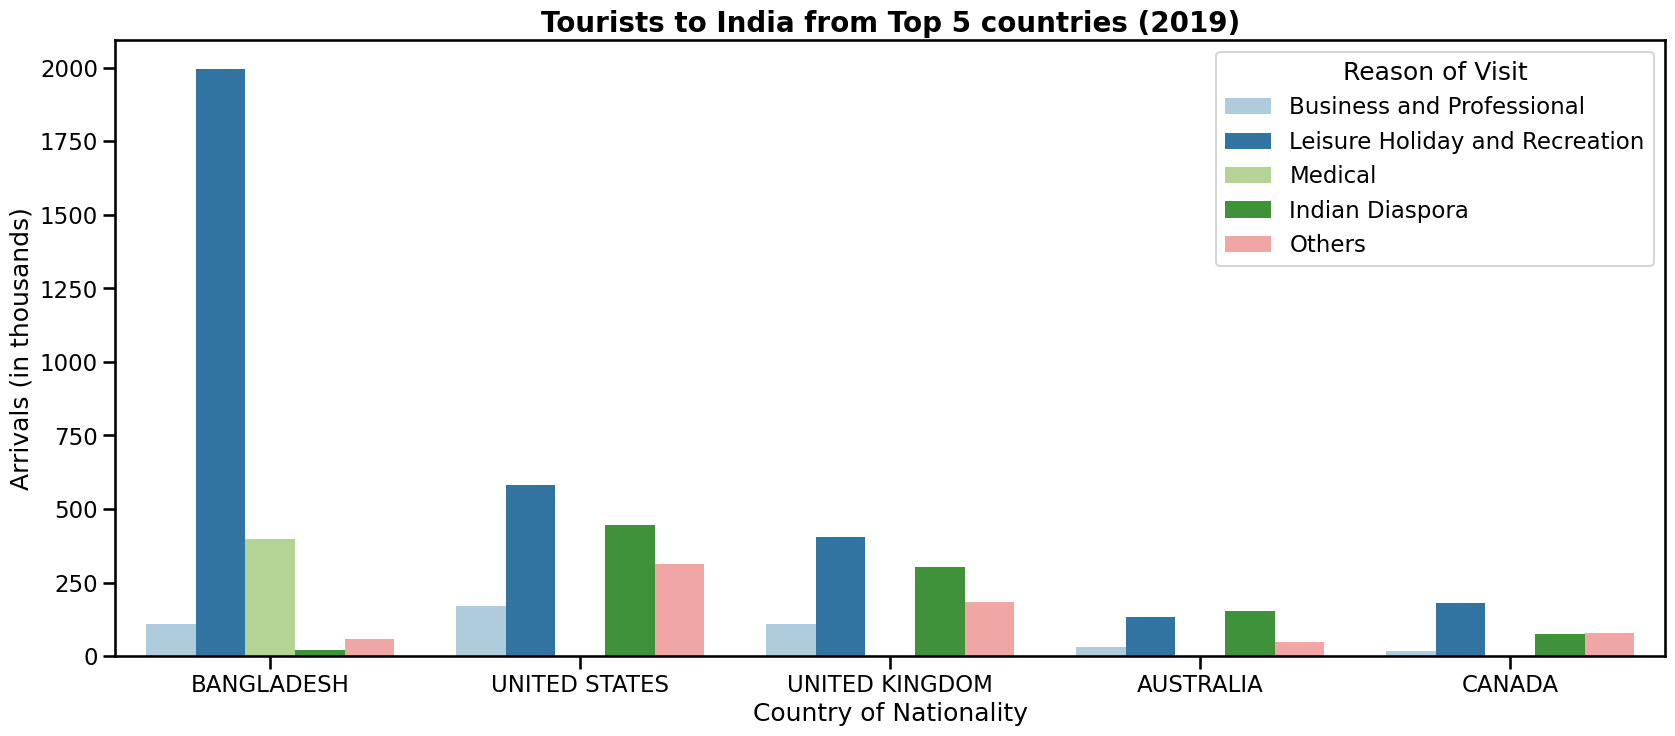

In [ ]:
df=pd.melt(countrywise,['Country of Nationality']).rename(columns={"variable":"Reason of Visit"})

# plotting bar (multicolumn) graph
plt.figure(figsize=(20,8))
# country v / s reason barplot
sns.barplot(x ='Country of Nationality',y='value', hue="Reason of Visit",data = df, palette='Paired')

plt.ylabel("Arrivals (in thousands)",fontsize=18)
plt.xlabel('Country of Nationality',fontsize=18)
plt.title("Tourists to India from Top 5 countries (2019)",fontsize=20,fontweight='bold')

# Show the plot
plt.show()

# **Average Distribution of Tourists to India based on the purpose of visit in 2019**

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Average distribution of tourists based on purpose of visit - 2019')

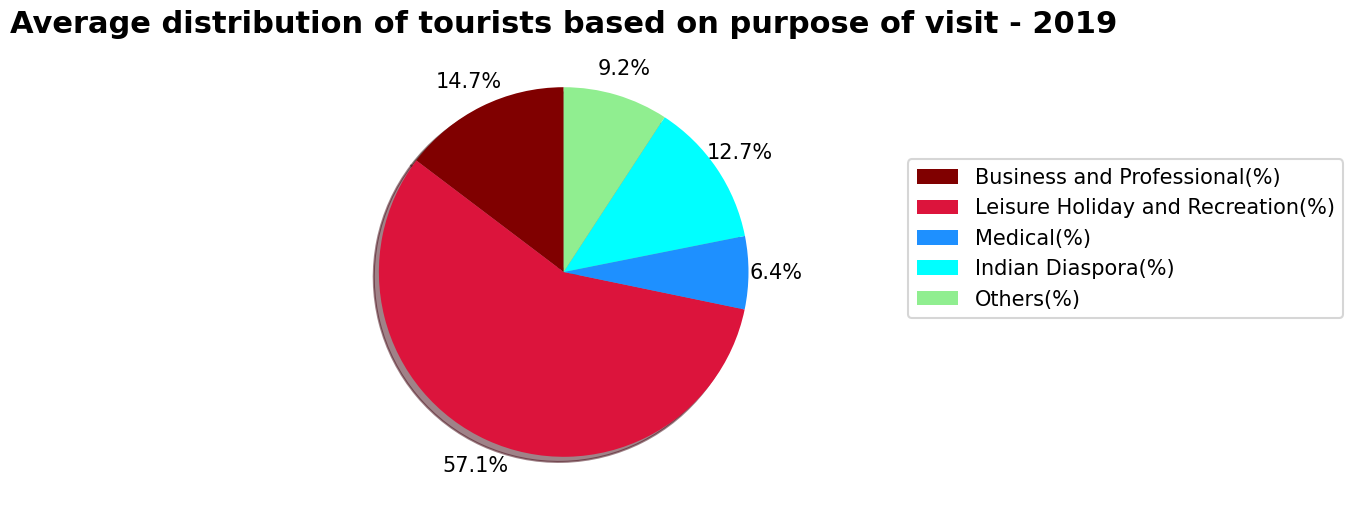

In [ ]:
grand_total=country_and_reason[country_and_reason['Country of Nationality']=='Grand Total'].copy()

reason_list=['Business and Professional(%)','Leisure Holiday and Recreation(%)','Medical(%)','Indian Diaspora(%)','Others(%)']
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen']

# plotting data on pie chart
plt.figure(figsize=(8,6))

pie=plt.pie(grand_total.loc[83,:].values.tolist()[3:], colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],reason_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)

plt.title("Average distribution of tourists based on purpose of visit - 2019",fontsize=22,fontweight='bold')

# displaying chart
plt.show()

#**Foreign tourists per State**

In [ ]:
path = '/content/drive/MyDrive/India-Tourism-Statistics-statewise_2019-2020_domestic_foreign.csv'
ind_tourism=pd.read_csv(path)

In [ ]:
ind_tourism.columns

Index(['S. No.', 'States/UTs', 'Domestic -2019', 'Foreign - 2019',
       'Domestic -2020', 'Foreign - 2020', 'Growth rate - DTV  2020/19',
       'Growth rate - FTV 2020/19'],
      dtype='object')

In [ ]:
ind_tourism.dtypes

S. No.                        object
States/UTs                    object
Domestic -2019                 int64
Foreign - 2019                 int64
Domestic -2020                 int64
Foreign - 2020                 int64
Growth rate - DTV  2020/19    object
Growth rate - FTV 2020/19     object
dtype: object

In [ ]:
# Parsing dataframe
foreign_statewise=ind_tourism[['States/UTs','Foreign - 2019','Foreign - 2020']].copy()
# sorting by Foreign-2019 in descending order
foreign_statewise.sort_values(by=['Foreign - 2019'], ascending=False, inplace=True)
foreign_statewise=foreign_statewise[foreign_statewise['States/UTs'].isin(['Grand Total'])==False]

# shifting the decimal places by 5 to the left
foreign_statewise['Foreign - 2019']=foreign_statewise['Foreign - 2019'] * 10**-5
foreign_statewise['Foreign - 2020']=foreign_statewise['Foreign - 2020'] * 10**-5

foreign_statewise.head()

States/UTs  Foreign - 2019  Foreign - 2020
31    Tamil Nadu         68.66327        12.28323
21    Maharashtra        55.28704        12.62409
34  Uttar Pradesh        47.45181         8.90932
9           Delhi        29.83436         6.81230
36   West Bengal         16.56145         4.63285

<Figure size 1600x5000 with 0 Axes>

Text(69.16327000000001, -0.2, '68.66')

Text(55.787040000000005, 0.8, '55.29')

Text(47.95181, 1.8, '47.45')

Text(30.334360000000004, 2.8, '29.83')

Text(17.06145, 3.8, '16.56')

Text(16.555600000000002, 4.8, '16.06')

Text(12.397710000000002, 5.8, '11.90')

Text(11.513430000000001, 6.8, '11.01')

Text(11.431410000000001, 7.8, '10.93')

Text(9.87113, 8.8, '9.37')

Text(6.587540000000001, 9.8, '6.09')

Text(6.45607, 10.8, '5.96')

Text(4.328760000000001, 11.8, '3.83')

Text(3.77958, 12.8, '3.28')

Text(3.7332600000000005, 13.8, '3.23')

Text(3.30356, 14.8, '2.80')

Text(2.2604300000000004, 15.8, '1.76')

Text(2.0440500000000004, 16.8, '1.54')

Text(2.02273, 17.8, '1.52')

Text(1.99919, 18.8, '1.50')

Text(1.8338800000000002, 19.8, '1.33')

Text(1.65128, 20.8, '1.15')

Text(1.0792000000000002, 21.8, '0.58')

Text(0.9804600000000001, 22.8, '0.48')

Text(0.94132, 23.8, '0.44')

Text(0.88652, 24.8, '0.39')

Text(0.76878, 25.8, '0.27')

Text(0.75813, 26.8, '0.26')

Text(0.66206, 27.8, '0.16')

Text(0.63608, 28.8, '0.14')

Text(0.57825, 29.8, '0.08')

Text(0.5681700000000001, 30.8, '0.07')

Text(0.55703, 31.8, '0.06')

Text(0.55577, 32.8, '0.06')

Text(0.52249, 33.8, '0.02')

Text(0.51666, 34.8, '0.02')

Text(0.5082, 35.8, '0.01')

Text(12.783230000000001, 0.2, '12.28')

Text(13.12409, 1.2, '12.62')

Text(9.409320000000001, 2.2, '8.91')

Text(7.3123000000000005, 3.2, '6.81')

Text(5.13285, 4.2, '4.63')

Text(4.96457, 5.2, '4.46')

Text(3.90755, 6.2, '3.41')

Text(4.09114, 7.2, '3.59')

Text(3.5808000000000004, 8.2, '3.08')

Text(3.5275100000000004, 9.2, '3.03')

Text(2.15325, 10.2, '1.65')

Text(2.60047, 11.2, '2.10')

Text(0.92665, 12.2, '0.43')

Text(1.4981900000000001, 13.2, '1.00')

Text(0.96694, 14.2, '0.47')

Text(1.17591, 15.2, '0.68')

Text(0.5049, 16.2, '0.00')

Text(0.81877, 17.2, '0.32')

Text(0.91339, 18.2, '0.41')

Text(1.4208, 19.2, '0.92')

Text(0.69935, 20.2, '0.20')

Text(0.60206, 21.2, '0.10')

Text(0.55317, 22.2, '0.05')

Text(0.67474, 23.2, '0.17')

Text(0.62218, 24.2, '0.12')

Text(0.51126, 25.2, '0.01')

Text(0.57285, 26.2, '0.07')

Text(0.52311, 27.2, '0.02')

Text(0.55412, 28.2, '0.05')

Text(0.53139, 29.2, '0.03')

Text(0.50961, 30.2, '0.01')

Text(0.52322, 31.2, '0.02')

Text(0.51382, 32.2, '0.01')

Text(0.50518, 33.2, '0.01')

Text(0.50265, 34.2, '0.00')

Text(0.50222, 35.2, '0.00')

Text(0.50413, 36.2, '0.00')

Text(0.5, 1.0, 'Foreign tourists per State/UTs [2019, 2020]')

Text(0.5, 0, 'Arrivals (in lakhs)')

Text(0, 0.5, 'States/UTs')

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Tamil Nadu '),
  Text(0, 1, 'Maharashtra'),
  Text(0, 2, 'Uttar Pradesh'),
  Text(0, 3, 'Delhi'),
  Text(0, 4, 'West Bengal '),
  Text(0, 5, 'Rajasthan  '),
  Text(0, 6, 'Kerala '),
  Text(0, 7, 'Punjab '),
  Text(0, 8, 'Bihar  '),
  Text(0, 9, 'Goa '),
  Text(0, 10, 'Karnataka '),
  Text(0, 11, 'Gujarat '),
  Text(0, 12, 'Himachal Pradesh  '),
  Text(0, 13, 'Madhya Pradesh'),
  Text(0, 14, 'Telengana'),
  Text(0, 15, 'Andhra Pradesh  '),
  Text(0, 16, 'Jharkhand'),
  Text(0, 17, 'Tripura '),
  Text(0, 18, 'Uttarakhand '),
  Text(0, 19, 'Puducherry'),
  Text(0, 20, 'Sikkim '),
  Text(0, 21, 'Odisha '),
  Text(0, 22, 'J&K '),
  Text(0, 23, 'Haryana '),
  Text(0, 24, 'Chandigarh  '),
  Text(0, 25, 'Ladakh'),
  Text(0, 26, 'Assam '),
  Text(0, 27, 'Meghalaya '),
  Text(0, 28, 'A&N Island '),
  Text(0, 29

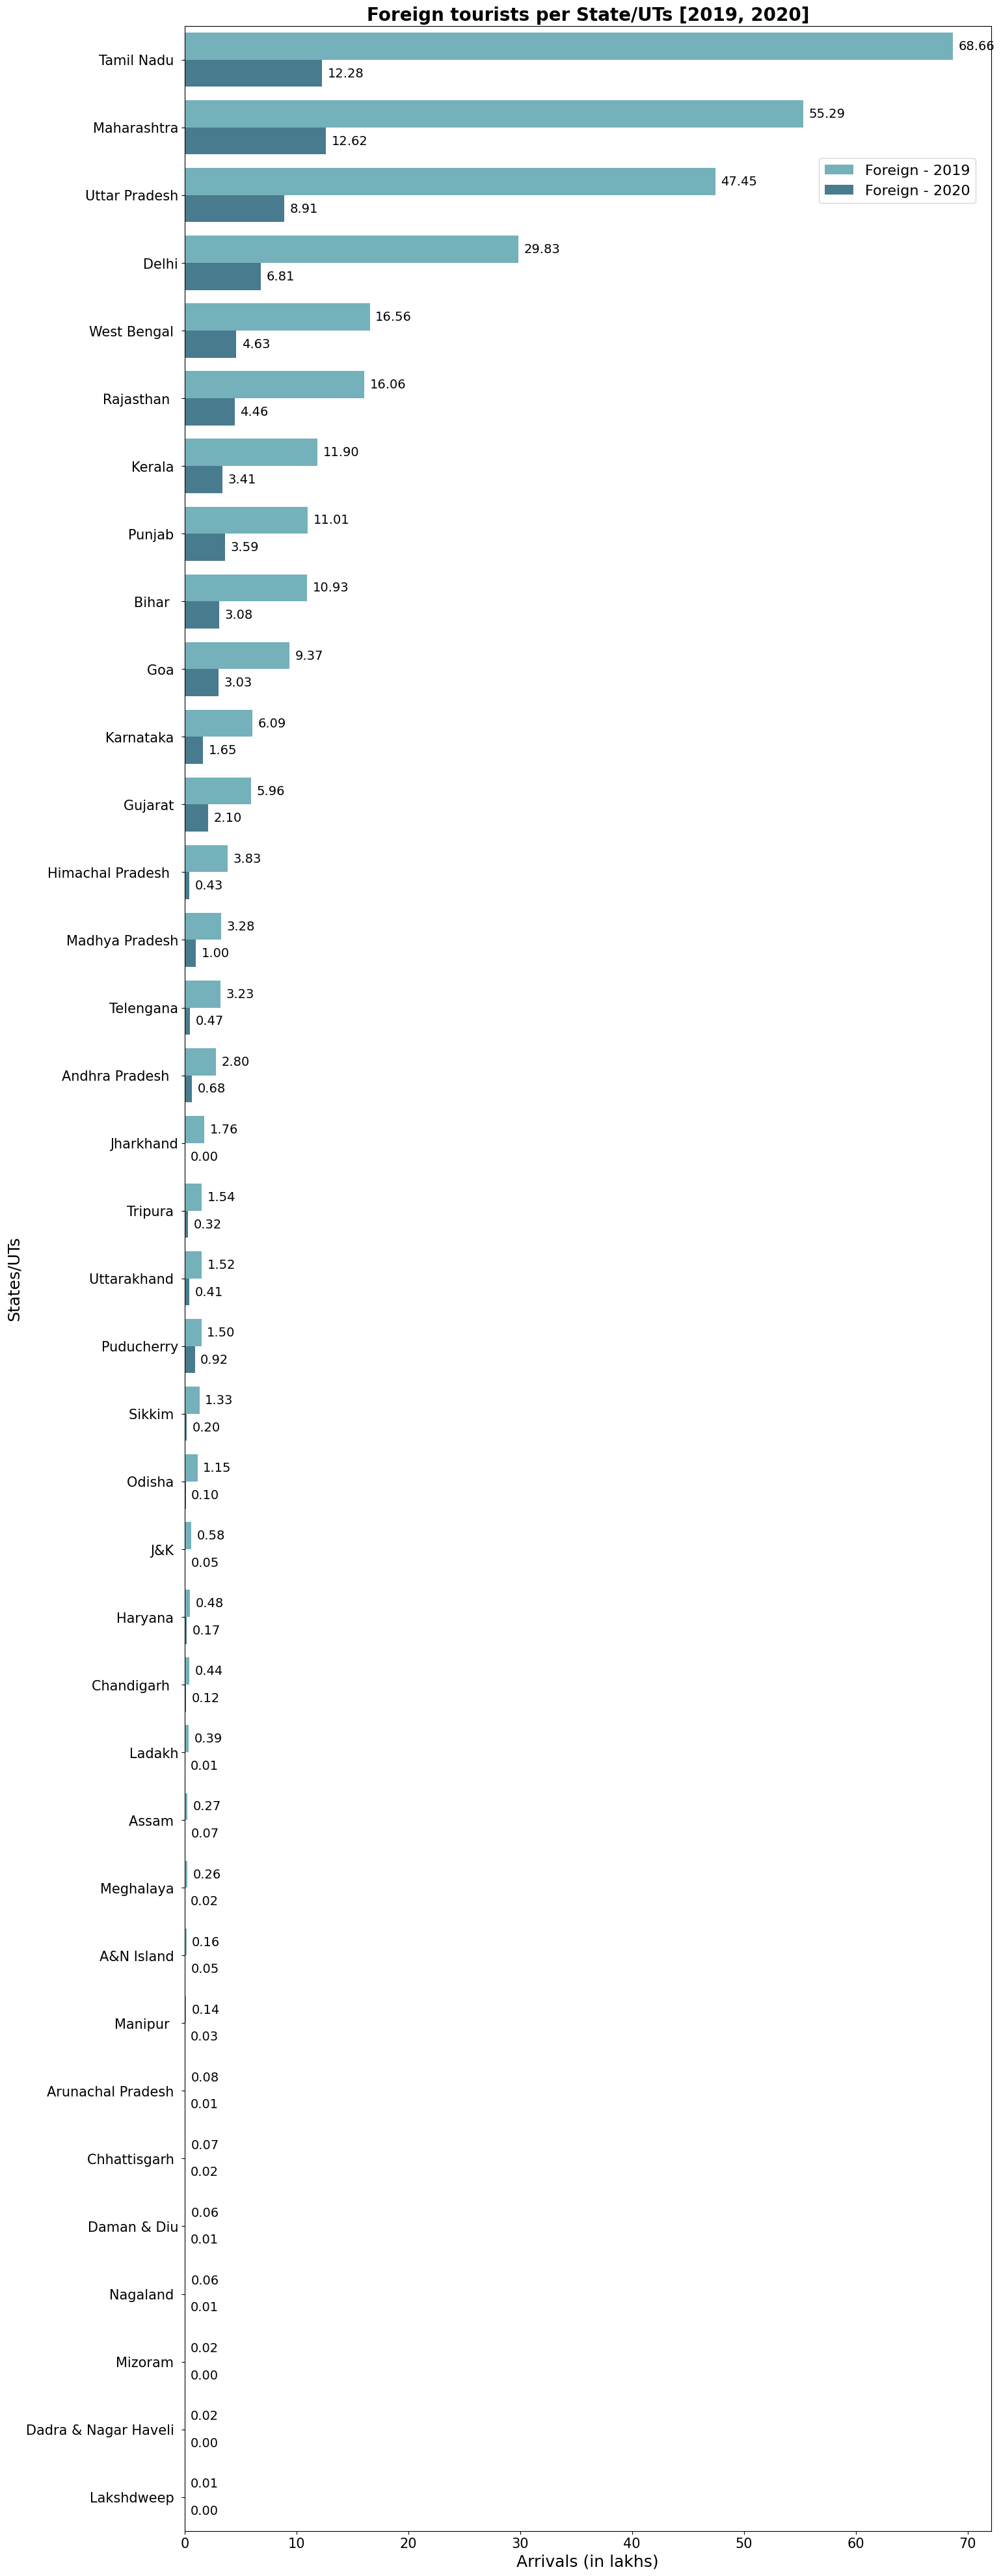

In [ ]:
df=pd.melt(foreign_statewise,['States/UTs']).rename(columns={"variable":"Year"})

# plotting data on horizontal bar graph
plt.figure(figsize=(16,50))
ax = sns.barplot(x="value", y="States/UTs", data=df, hue='Year', palette='GnBu_d')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',  # vertical alignment
            fontsize=14)

plt.title("Foreign tourists per State/UTs [2019, 2020]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in lakhs)", fontsize=18)
plt.ylabel("States/UTs", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.99,0.95), prop={'size': 16})

# display the chart
plt.show()